# ¿Qué vende un coche?

__Análisis Inicial:__

 - Cargar y estudiar los datos
 - Ruta de archivo: /datasets/vehicles_us.csv


__Preprocesamiento:__

 - Crear una copia del DataFrame original 
 - Identificar y manejar valores ausentes
 - Convertir tipos de datos
 
 
__Nuevos Datos:__

 - Calcular fechas relevantes (día de la semana y mes en el que el anuncio se colocó)
 - Calcular la antigüidad del vehículo cuando el anuncio se colocó
 - Calcular la media de millaje por año
 - Transformar la columna `condition` en valores numéricos


__Exploración de Datos:__

 - Trazar histogramas para características clave (`price`, `model_year`, `date_posted`, `odometer`, `cylinders` y `condition`)
 - Eliminar valores atípicos (en un filtrado del Dataframe) y trazar nuevos histogramas
 - Analizar la duración de los anuncios 
 - Calcular la media y la mediana para describir la vida útil habitual de un anuncio
 - Determinar cuándo se eliminan rápidamente los anuncios y cuándo son publicados por un tiempo anormalmente largo
 - Analizar el número de anuncios y el precio medio para cada tipo de vehículo
 - Trazar un gráfico mostrando la dependencia de los números de anuncios en cada tipo de vehículo
 - Seleccionar los dos tipos con el mayor número de anuncios


__Análisis de Precio:__

 - Identificar factores clave para el precio segun los modelos más populares 
 - Relacionar precio con edad, millaje, condición y tipo de transmisión y color
 - Trazar gráficos de caja y bigotes para las variables categóricas y gráficos de dispersión para el resto


__Conclusión:__

 - Resumir resultados y hallazgos
 - Explicar problemas y manejo de valores problematicos

# Inicialización

In [1]:
# cargar las librerías

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from IPython.display import display

## Cargar datos

In [2]:
# cargar el archivo de datos en un dataframe

data_original = pd.read_csv('./vehicles_us.csv')

## Explorar datos iniciales

El dataset contiene los siguientes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission`
- `paint_color`
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — desde la publicación hasta que se elimina

In [3]:
# crear una copia del dataframe original y mostrar informaciones sobre el dataframe

data = data_original.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# mostrar filas y columnas del dataframe

data.shape

(51525, 13)

In [5]:
# mostrar las primeras filas del dataframe

data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [6]:
# mostrar el resumen estádistico de los datos

data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


<Axes: >

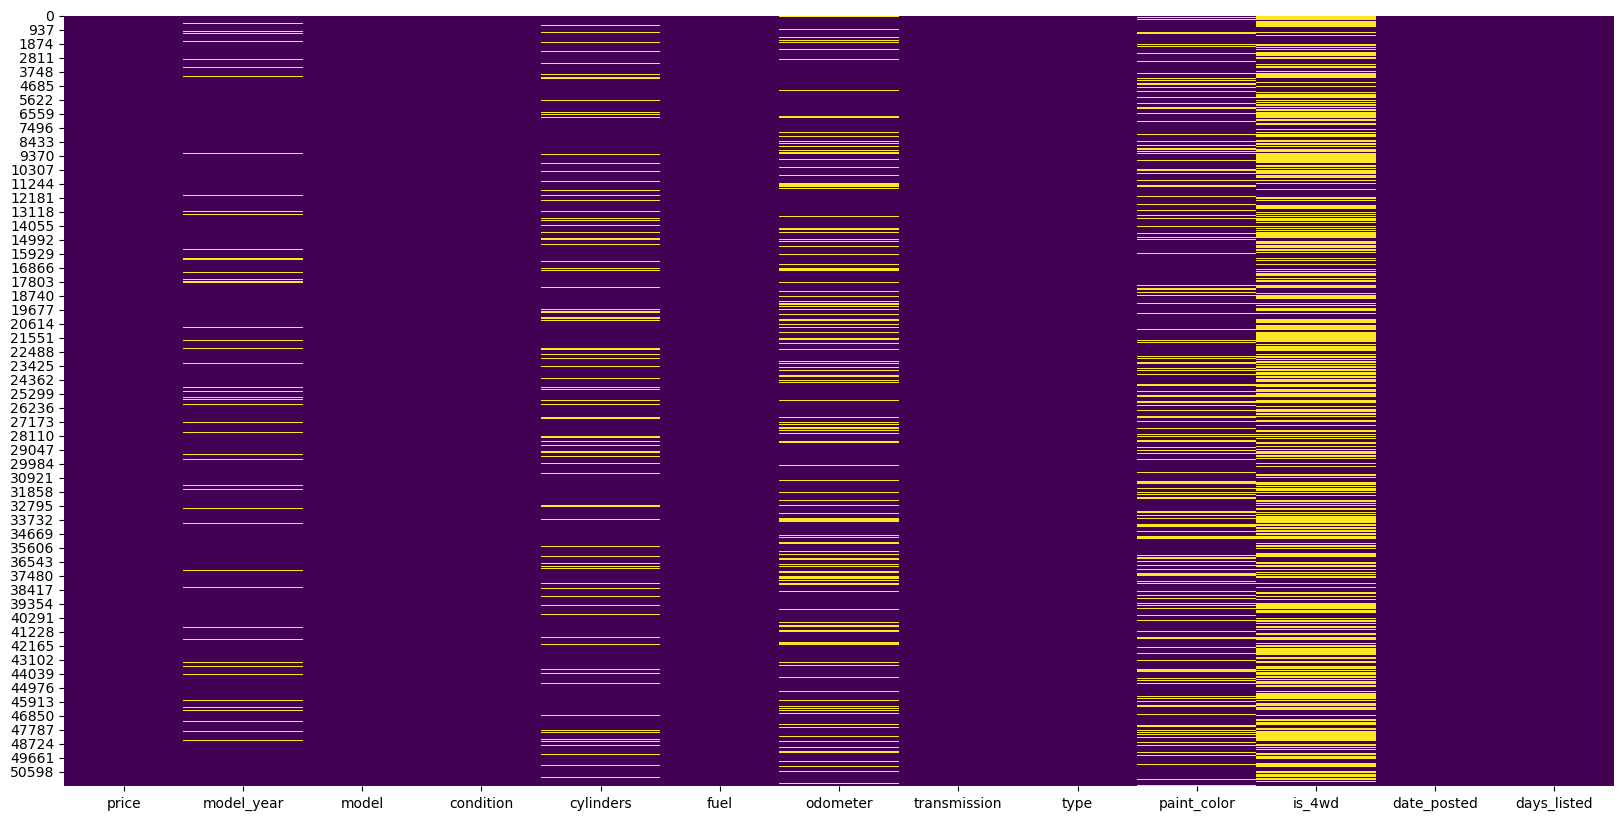

In [7]:
# mostrar la distribución de los valores ausentes

plt.figure(figsize=(20, 10))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')

__Evaluación:__

 - Cargamos el __archivo de datos__ en un DataFrame, `data` que contiene 51525 filas y 13 columnas
 - Los datos se dividen en __números enteros__, __números flotantes__ y __objetos__
 - Hay __valores ausentes__ en 5 de las 13 columnas
 - La __distribución__ de los valores ausentes no sugiere ningún patrón 
 - Cuando una columna contiene valores ausentes (`NaN`), esto puede llevar a la __conversión__ de los _valores numéricos enteros_ en _valores de punto flotante_
 - Una vez que se hayan abordado los valores ausentes, convendría volver a convertirlos a __enteros__ para mantener la coherencia en el tipo de datos
 - Los valores en `date_posted` deberían ser __fechas__ (`datetime64`) en lugar de _objetos_ 
 - Es importante mencionar que los valores ausentes en la columna `is_4wd` podrían indicar que la tracción a las 4 ruedas __no está disponible__
 - Después de esta aclaración, procederemos a __convertir__ los valores no nulos en `True` y los valores ausentes en `False`

In [8]:
# mostrar los valores no nulos en la columna `is_4wd`

data['is_4wd'].value_counts()

1.0    25572
Name: is_4wd, dtype: int64

In [9]:
# mostrar los valores nulos en la columna `is_4wd`

data['is_4wd'].isnull().sum()

25953

In [10]:
# sumar valores nulos y non nulos en la columna `is_4wd`

valores_4wd = data['is_4wd'].value_counts()
valores_ausentes_4wd = data['is_4wd'].isnull().sum()

valores_totales_4wd = valores_4wd + valores_ausentes_4wd
valores_totales_4wd

1.0    51525
Name: is_4wd, dtype: int64

In [11]:
# mostrar un filtrado del dataframe donde se encuentran valores no nulos en `is_4wd`

filtered_data_true = data[data['is_4wd'] == 1]
filtered_data_true

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51507,29500,2012.0,toyota tundra,good,8.0,gas,NaN,automatic,pickup,grey,1.0,2018-05-01,31
51509,5980,2010.0,subaru impreza,excellent,4.0,gas,121778.0,manual,hatchback,white,1.0,2019-01-10,8
51513,17999,2014.0,ram 1500,like new,8.0,gas,154000.0,automatic,pickup,white,1.0,2018-06-21,11
51515,12000,2005.0,chevrolet silverado 2500hd,good,8.0,diesel,228000.0,automatic,pickup,silver,1.0,2018-08-18,52


In [12]:
# mostrar un filtrado del dataframe donde se encuentran valores ausentes en `is_4wd`

filtered_data_false = data[data['is_4wd'].isna()]
filtered_data_false

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
11,8990,2012.0,honda accord,excellent,4.0,gas,111142.0,automatic,sedan,grey,NaN,2019-03-28,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


In [13]:
# imputar los valores ausentes en `is_4wd` como False y los valores no nulos como True

data['is_4wd'].fillna(False, inplace=True)
data['is_4wd'] = data['is_4wd'].astype(bool)

data['is_4wd'].value_counts()

False    25953
True     25572
Name: is_4wd, dtype: int64

In [14]:
# comprobar que el dataframe se actualizó correctamente

data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,True,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,False,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,True,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,False,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,True,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,True,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,True,2019-02-15,17


In [15]:
# convertir los valores en la columna `date_posted` en fechas

data['date_posted'] = pd.to_datetime(data['date_posted'])
print('11  date_posted   51525 non-null ', data['date_posted'].dtype)

11  date_posted   51525 non-null  datetime64[ns]


In [16]:
# mostrar el numeros de filas duplicadas en el dataframe 

duplicates = data.duplicated()
duplicate_rows = data[duplicates]
duplicate_rows.shape

(0, 13)

In [17]:
# mostrar los valores ausentes en el dataframe

missing_values_count = data.isnull().sum()
missing_values_count

price              0
model_year      3619
model              0
condition          0
cylinders       5260
fuel               0
odometer        7892
transmission       0
type               0
paint_color     9267
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

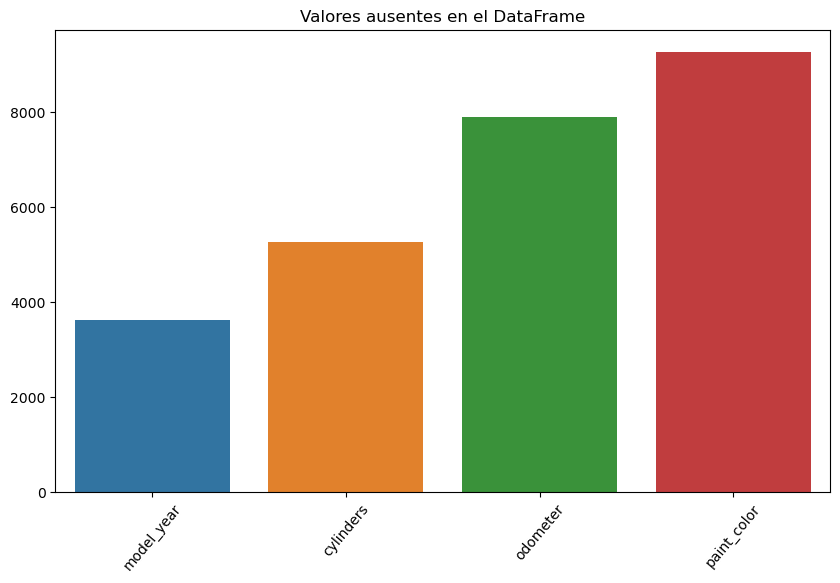

In [18]:
# trazar un gráfico para mostrar los valores ausentes en el dataframe

plt.figure(figsize=(10, 6))
missing_columns = missing_values_count[missing_values_count > 0]
sns.barplot(x=missing_columns.index, y=missing_columns.values)
plt.title('Valores ausentes en el DataFrame')
plt.xticks(rotation=50)
plt.show()

In [19]:
# mostrar el porcentaje total de valores ausentes en el dataframe

total_missing = data.isnull().sum().sum()
total_cells = data.size

missing_percentage_total = (total_missing / total_cells) * 100

print(f"Porcentaje total de valores ausentes en el DataFrame: {missing_percentage_total:.2f}%")

Porcentaje total de valores ausentes en el DataFrame: 3.89%


In [20]:
# mostrar el porcentaje de valores ausentes por cada columna

missing_values_count = data.isnull().sum()
total_rows = len(data)

missing_percentage = (missing_values_count / total_rows) * 100

print("Porcentaje de valores ausentes por columna:")
for column, percentage in missing_percentage.items():
    if percentage > 0:
        print(f"{column}: {int(percentage)}%")

Porcentaje de valores ausentes por columna:
model_year: 7%
cylinders: 10%
odometer: 15%
paint_color: 17%


__Evaluación__

 - Quedan __4 columnas__ con valores ausentes: `model_year`, `cylinders`, `odometer` y `paint_color`
 - Los __valores ausentes__ son entre 3000 y 9000 entradas sobre las 51525 del DataFrame
 - Aunque en términos porcentuales los valores ausentes parecen bajos, debido al tamaño del DataFrame, su __impacto es significativo__ en cada columna

## Conclusiones y siguientes pasos

 - `model_year`: Aproximadamente el __7%__ de los registros no tienen información sobre el __año del modelo__ del vehículo
 - Dado que el porcentaje de valores ausentes __no es muy alto__, podríamos considerar estrategias para imputar estos valores ausentes
 - `cylinders`: Alrededor del __10%__ de los vehículos no tienen información sobre el __número de cilindros__ en el motor
 - Dependiendo de la __importancia de esta característica__, podríamos explorar formas de manejar estos valores ausentes
 - `odometer`: Cerca del __15%__ de los registros no tienen información sobre el __kilometraje del vehículo__
 - Dado que esta columna podría ser __relevante para el análisis del precio__, es importante considerar cómo abordar estos valores ausentes
 - `paint_color`: Una __proporción significativa__ (más del __17%__) de registros no tiene información sobre el __color de la pintura__ del vehículo
 - Dependiendo de la importancia de esta característica en el análisis, podríamos evaluar cómo tratar estos valores ausentes
 - Vamos a explorar la __distribución__ de los valores en cada columna para adquirir una comprensión más profunda del DataFrame
 - Esto nos ayudará en tomar __decisiones informadas__ sobre cómo abordar los valores ausentes
 - Es importante encontrar la mejor manera de imputar estos valores de forma __coherente con el contexto__ y la naturaleza de los datos

In [21]:
# mostrar la matriz de correlación por los valores no nulos en el dataframe

cleaned_data = data.dropna()

display(cleaned_data.corr(numeric_only=True))
display(cleaned_data.shape)

,price,model_year,cylinders,odometer,is_4wd,days_listed
price,1.000000,0.430031,0.293487,-0.418083,0.317831,0.002341
model_year,0.430031,1.000000,-0.149999,-0.472805,0.048431,-0.004062
cylinders,0.293487,-0.149999,1.000000,0.088469,0.397725,0.005306
odometer,-0.418083,-0.472805,0.088469,1.000000,0.034289,0.005526
is_4wd,0.317831,0.048431,0.397725,0.034289,1.000000,0.008057
days_listed,0.002341,-0.004062,0.005306,0.005526,0.008057,1.000000


(29916, 13)

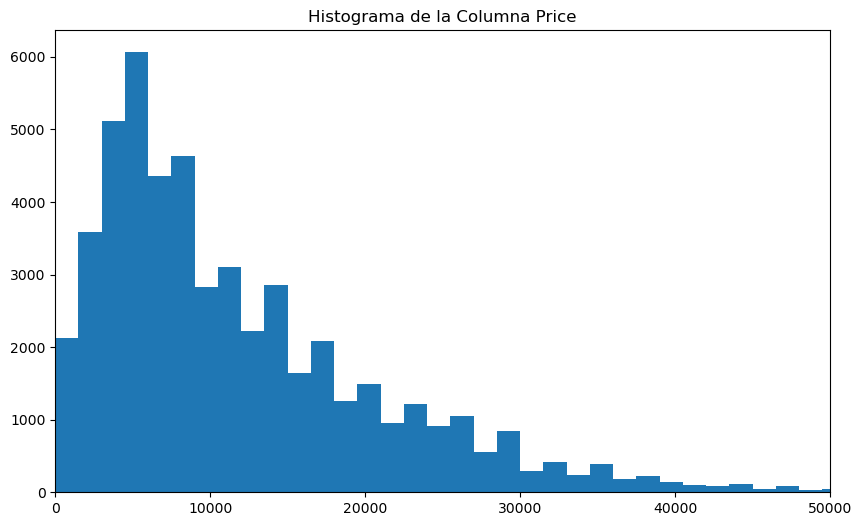

In [22]:
# trazar histograma por el precio del vehículo

plt.figure(figsize=(10, 6))
plt.hist(data['price'], bins=250)
plt.xlim(0, 50000)
plt.title('Histograma de la Columna Price')
plt.show()

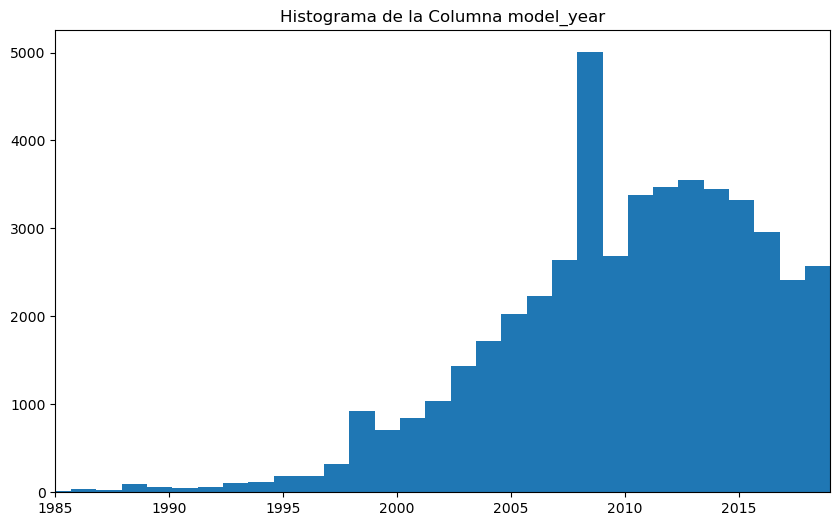

In [23]:
# trazar histograma por el año del vehículo

plt.figure(figsize=(10, 6))
plt.hist(data['model_year'], bins=100)
plt.title('Histograma de la Columna model_year')
plt.xlim(1985, 2019)
plt.show()

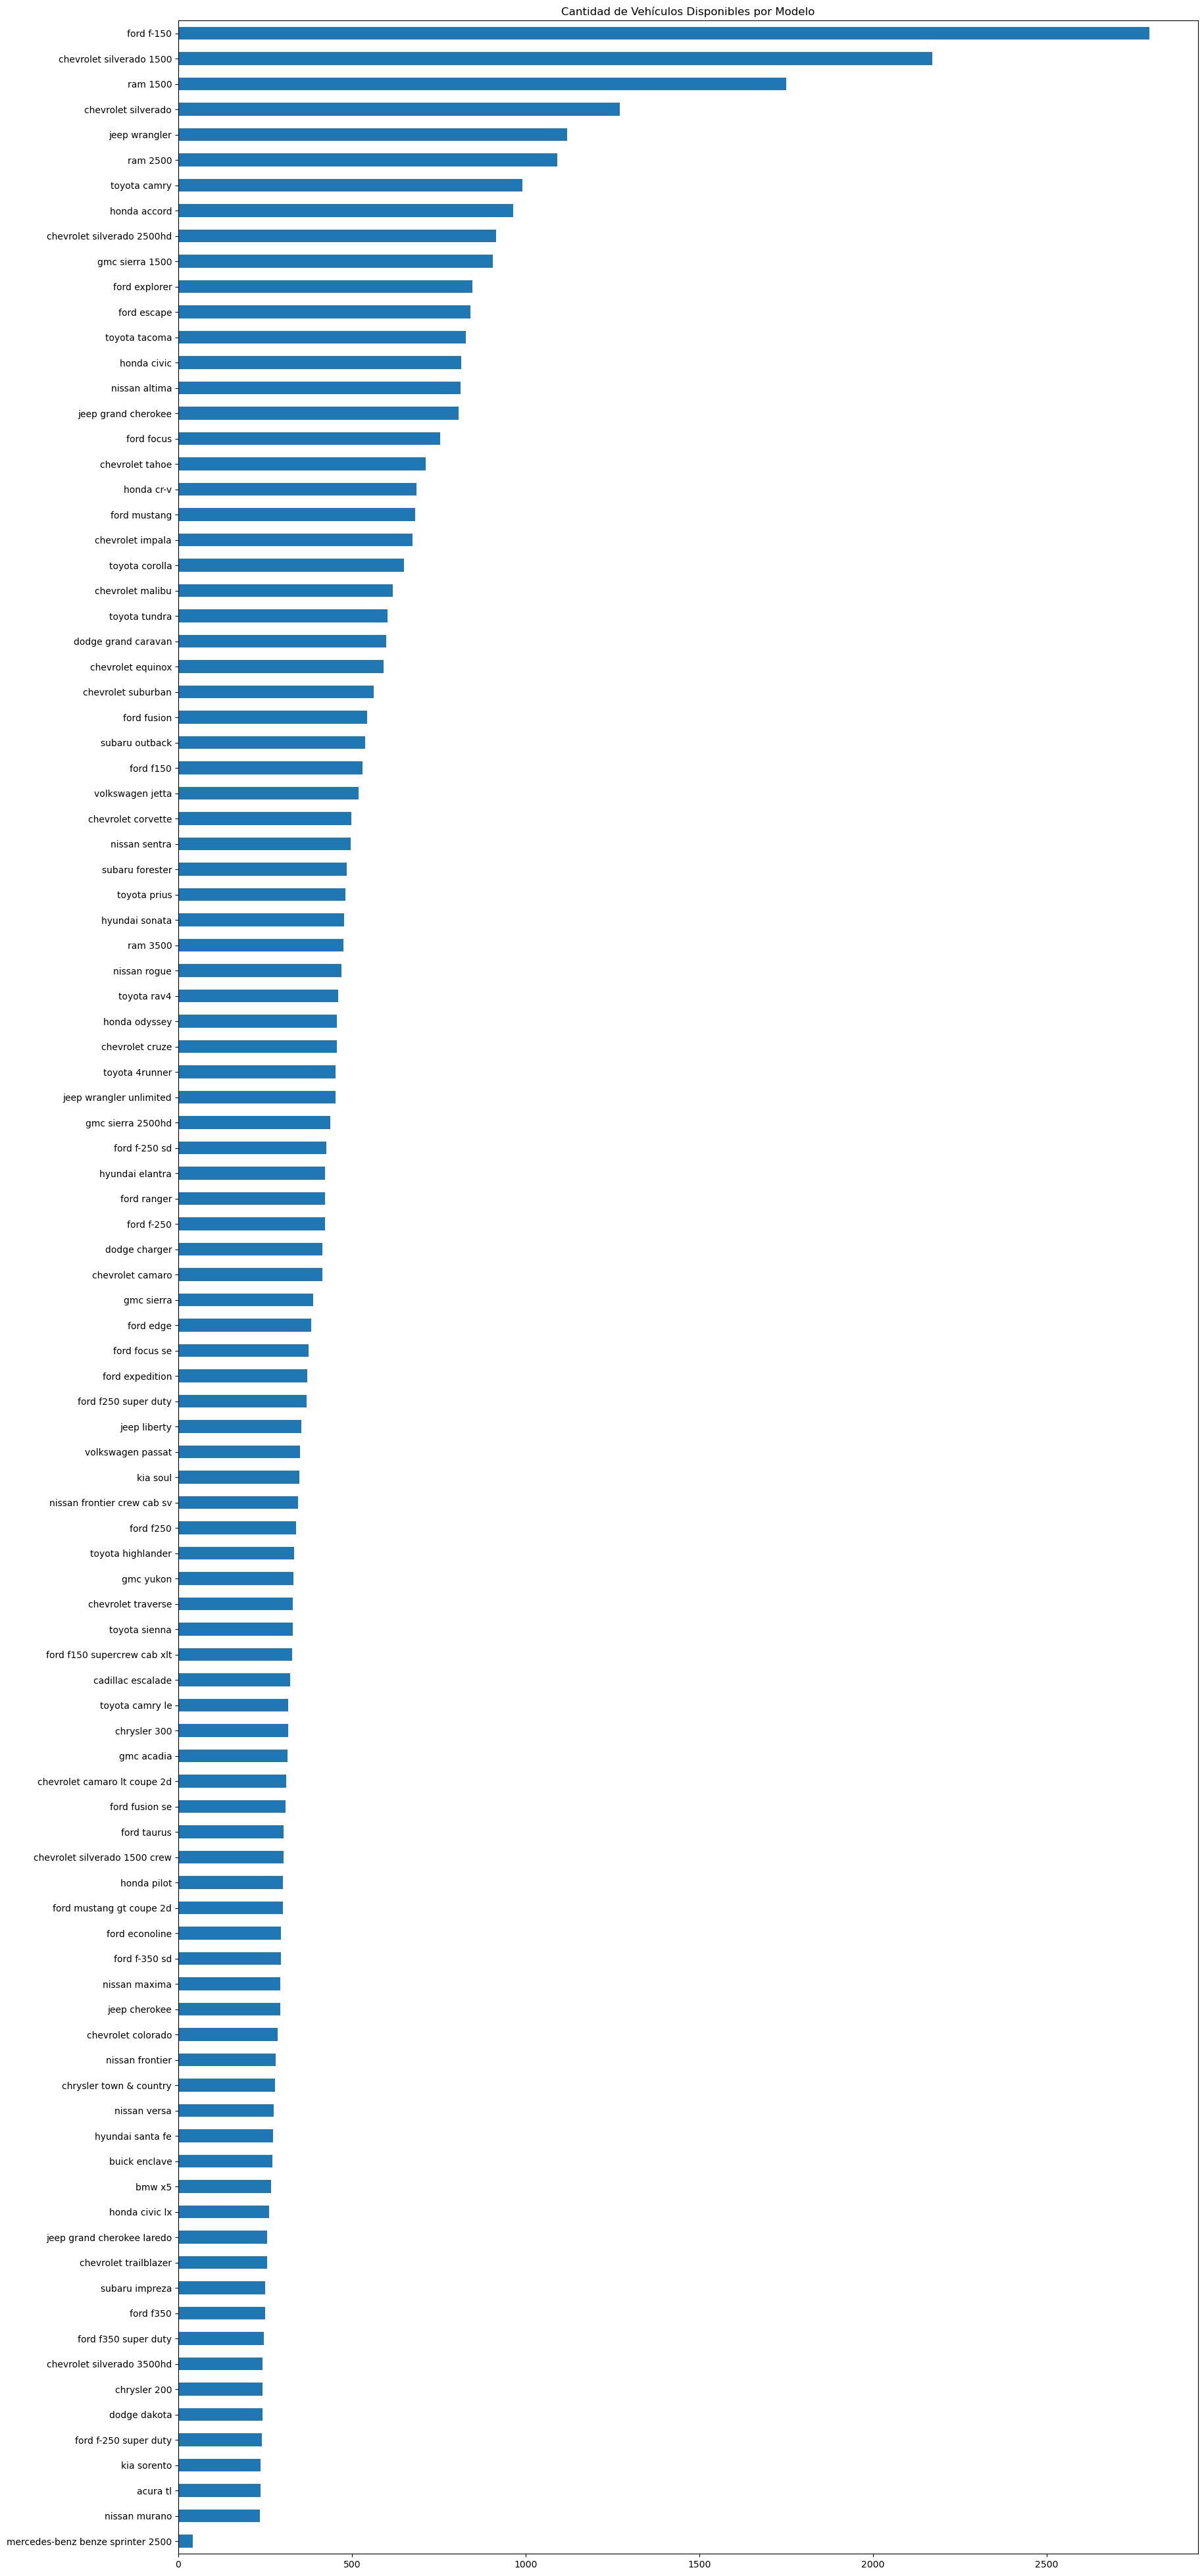

In [24]:
# trazar un grafico de barras para mostrar la disponibilidad de los diferentes modelos 

model_counts = data['model'].value_counts()
model_counts_sorted = model_counts.sort_values(ascending=True)

plt.figure(figsize=(20, 50))
model_counts_sorted.plot(kind='barh')
plt.title('Cantidad de Vehículos Disponibles por Modelo')
plt.show()

In [25]:
# mostrar la distribución de los valores en `condition`

data['condition'].value_counts()

excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: condition, dtype: int64

In [26]:
# mostrar la distribución de los valores en `cylinders`

data['cylinders'].value_counts()

8.0     15844
6.0     15700
4.0     13864
10.0      549
5.0       272
3.0        34
12.0        2
Name: cylinders, dtype: int64

In [27]:
# mostrar la distribución de los valores en `fuel`

data['fuel'].value_counts()

gas         47288
diesel       3714
hybrid        409
other         108
electric        6
Name: fuel, dtype: int64

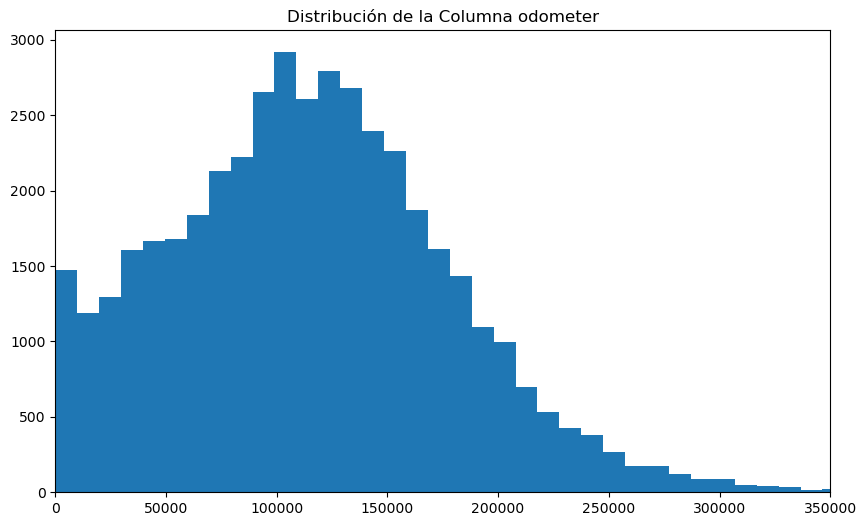

In [28]:
# trazar diagrama de dispersion por el millaje del vehículo

plt.figure(figsize=(10, 6))
plt.hist(data['odometer'], bins=100)
plt.xlim(0, 350000)
plt.title('Distribución de la Columna odometer')
plt.show()

In [29]:
# mostrar la distribución de los valores en `transmission`

data['transmission'].value_counts()

automatic    46902
manual        2829
other         1794
Name: transmission, dtype: int64

In [30]:
# mostrar la distribución de los valores en `type`

data['type'].value_counts()

SUV            12405
truck          12353
sedan          12154
pickup          6988
coupe           2303
wagon           1541
mini-van        1161
hatchback       1047
van              633
convertible      446
other            256
offroad          214
bus               24
Name: type, dtype: int64

In [31]:
data['paint_color'].value_counts()

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

In [32]:
# mostrar la distribución de los valores en `is_4wd`

data['is_4wd'].value_counts()

False    25953
True     25572
Name: is_4wd, dtype: int64

In [33]:
# mostrar el resumen estadistico de la columna `days_listed`

data['days_listed'].describe()

count    51525.00000
mean        39.55476
std         28.20427
min          0.00000
25%         19.00000
50%         33.00000
75%         53.00000
max        271.00000
Name: days_listed, dtype: float64

# Tratar los valores ausentes

In [34]:
# imputar los valores de `model_year` con los valores en las filas con el mismo modelo y odometer no nulos

for index, row in data.iterrows():
    if pd.isna(row['model_year']):
        model = row['model']
        odometer = row['odometer']
        replacement = data[(data['model'] == model) & (data['odometer'].notna())]['model_year'].first_valid_index()
        if replacement is not None:
            data.at[index, 'model_year'] = data.at[replacement, 'model_year']

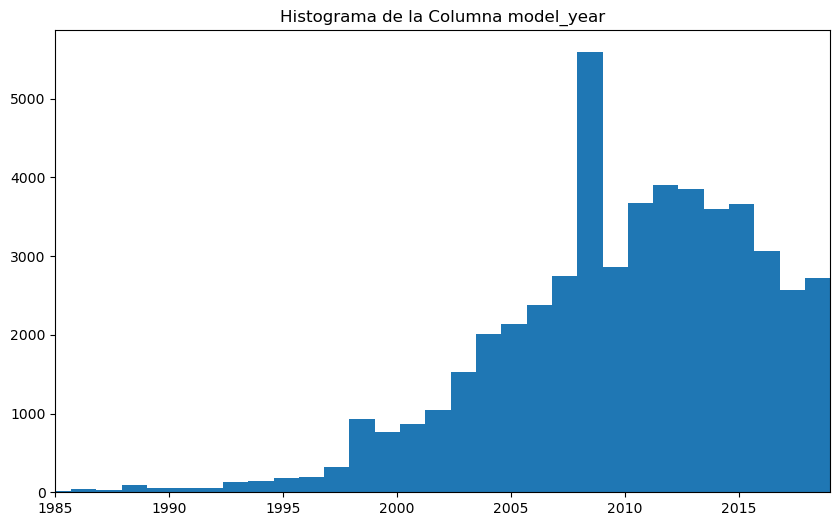

In [35]:
# comprobar si la distribución es coherente con el dataframe original

plt.figure(figsize=(10, 6))
plt.hist(data['model_year'], bins=100)
plt.title('Histograma de la Columna model_year')
plt.xlim(1985, 2019)
plt.show()

In [36]:
# comprobar si el dataframe se actualizó correctamente

data['model_year'].isna().sum()

7

In [37]:
# mostrar los valores ausentes en `model_year`

data[data['model_year'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
4149,34900,NaN,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,False,2018-10-12,28
11541,34900,NaN,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,NaN,False,2018-05-28,24
19877,34900,NaN,mercedes-benz benze sprinter 2500,excellent,NaN,diesel,NaN,automatic,van,NaN,False,2018-10-16,44
25982,34900,NaN,mercedes-benz benze sprinter 2500,excellent,NaN,diesel,NaN,automatic,van,black,False,2018-06-06,37
31895,34900,NaN,mercedes-benz benze sprinter 2500,excellent,NaN,diesel,NaN,automatic,van,black,False,2018-05-21,59
34466,34900,NaN,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,False,2019-04-09,80
36518,34900,NaN,mercedes-benz benze sprinter 2500,excellent,NaN,diesel,NaN,automatic,van,black,False,2018-05-26,34


In [38]:
# mostrar el año del vehículo

data[data['model']=='mercedes-benz benze sprinter 2500'].head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
42,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,False,2019-01-15,16
1642,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,False,2018-12-04,36
2232,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,False,2018-08-23,70
2731,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,False,2019-04-12,31
4149,34900,NaN,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,False,2018-10-12,28


In [39]:
# imputar los ultimos valores ausentes

data['model_year'] = data['model_year'].fillna(2013.0)

In [40]:
# comprobar si el dataframe se actualizó correctamente

data['model_year'].isna().sum()

0

__Imputación de los valores ausentes en la columna `model_year`__

 - Se utilizó un __bucle for__ para iterar a través de cada fila del DataFrame
 - Si se encontraba un valor nulo en `model_year`, se identificaba el _modelo_ y el _millaje_ __correspondiente__ a esa fila
 - Buscamos en el DataFrame aquellos registros que __coincidieran__ con el mismo _modelo_ y tuvieran un valor de _odómetro_ no nulo
 - Tomamos el índice del primer registro válido encontrado para __reemplazar__ el valor nulo en la columna `model_year`
 - Trazamos un histograma de la columna `model_year` para averiguar que se mantuvo __coherencia__ con los datos originales
 - Verificamos si el DataFrame se actualizó correctamente y encontramos __7 valores ausentes__ en la columna
 - Estos valores ausentes __fueron identificados__ como pertenecientes al modelo 'mercedes-benz benze sprinter 2500'
 - Imputamos estos 7 valores con el __año de fabricación__ de este modelo, que es el 2013

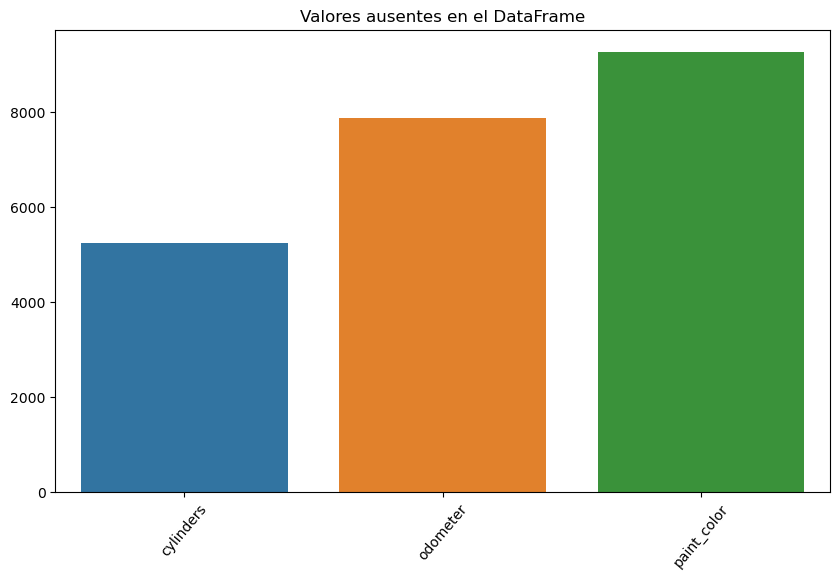

In [41]:
# trazar un gráfico actualizado para mostrar los valores ausentes en el dataframe

plt.figure(figsize=(10, 6))
missing_columns = data.isnull().sum()  
missing_columns = missing_columns[missing_columns > 0]
sns.barplot(x=missing_columns.index, y=missing_columns.values)
plt.title('Valores ausentes en el DataFrame')
plt.xticks(rotation=50)
plt.show()

In [42]:
# mostrar los valores ausentes en la columna `cylinders`

data['cylinders'].isna().sum()

5260

In [43]:
# mostrar un filtrado del dataframe donde hay valores ausentes en la columna `cylinders`

filtered_data = data[data['cylinders'].isnull()]
filtered_data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,True,2019-02-15,17
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,NaN,False,2018-05-05,22
37,7500,2005.0,toyota tacoma,good,NaN,gas,160000.0,automatic,pickup,NaN,False,2018-07-22,44
59,5200,2006.0,toyota highlander,good,NaN,gas,186000.0,automatic,SUV,green,False,2018-12-20,2
63,30000,1966.0,ford mustang,excellent,NaN,gas,51000.0,manual,convertible,red,False,2019-01-23,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51429,3250,2004.0,toyota camry,good,NaN,gas,179412.0,automatic,sedan,NaN,False,2018-07-02,25
51442,28990,2018.0,ford f150,excellent,NaN,gas,10152.0,automatic,truck,white,True,2018-06-13,47
51460,5995,2007.0,ford fusion,excellent,NaN,gas,88977.0,manual,sedan,silver,False,2019-03-27,66
51477,6499,2007.0,acura tl,good,NaN,gas,112119.0,automatic,sedan,white,False,2018-06-22,28


In [44]:
# mostrar el recuento de los modelos corresspondientes a los valores no nulos de `cylinders` 

model_cylinder_counts = data[data['cylinders'].notnull()].groupby('cylinders')['model'].nunique()
print(model_cylinder_counts)

cylinders
3.0     18
4.0     74
5.0     21
6.0     91
8.0     59
10.0    42
12.0     2
Name: model, dtype: int64


In [45]:
# identificar los modelos con valores ausentes en `cylinders`

models_with_missing_cylinders = data[data['cylinders'].isna()]['model']
models_with_missing_cylinders

9              honda pilot
36            chrysler 300
37           toyota tacoma
59       toyota highlander
63            ford mustang
               ...        
51429         toyota camry
51442            ford f150
51460          ford fusion
51477             acura tl
51486     hyundai santa fe
Name: model, Length: 5260, dtype: object

In [46]:
# calcular el promedio de cilindros por modelo

model_avg_cylinders = data.groupby('model')['cylinders'].mean()
model_avg_cylinders

model
acura tl             5.971564
bmw x5               6.406375
buick enclave        6.000000
cadillac escalade    7.986395
chevrolet camaro     6.887097
                       ...   
toyota sienna        5.952381
toyota tacoma        5.345205
toyota tundra        7.919561
volkswagen jetta     4.281116
volkswagen passat    4.325949
Name: cylinders, Length: 100, dtype: float64

In [47]:
# definir los valores disponibles para cilindros

available_cylinders = [3.0, 4.0, 5.0, 6.0, 8.0, 10.0, 12.0]

In [48]:
# redondear los promedios de cilindros al valor más cercano disponible

for model in model_avg_cylinders.index:
    if model_avg_cylinders[model] is not None:
        rounded_avg = min(available_cylinders, key=lambda x: abs(x - model_avg_cylinders[model]))
        model_avg_cylinders[model] = rounded_avg

print(model_avg_cylinders)

model
acura tl             6.0
bmw x5               6.0
buick enclave        6.0
cadillac escalade    8.0
chevrolet camaro     6.0
                    ... 
toyota sienna        6.0
toyota tacoma        5.0
toyota tundra        8.0
volkswagen jetta     4.0
volkswagen passat    4.0
Name: cylinders, Length: 100, dtype: float64


In [49]:
# imputar los valores ausentes con el promedio rondeado

for model, avg_cylinders in model_avg_cylinders.items():
    rows_to_impute = (data['model'] == model) & (data['cylinders'].isna())
    data.loc[rows_to_impute, 'cylinders'] = avg_cylinders

In [50]:
# comprobar que el dataframe se actualizó correctamente

data['cylinders'].isna().sum()

0

__Imputación de los valores ausentes en la columna `cylinders`__

 - Exploramos la __correlación__ entre las columnas `model` y `cylinders`
 - Para cada valor no nulo en `cylinders`, identificamos los __valores únicos correspondientes__ en la columna `model`
 - __Visualizamos__ el recuento de modelos únicos para cada valor de cilindros no nulo
 - Calculamos los __promedios__ de cilindros por modelo 
 - Ajustamos al valor de cilindros más cercano entre los __valores disponibles__ en el DataFrame original
 - Utilizamos estos promedios ajustados para __imputar los valores ausentes__ en la columna `cylinders`

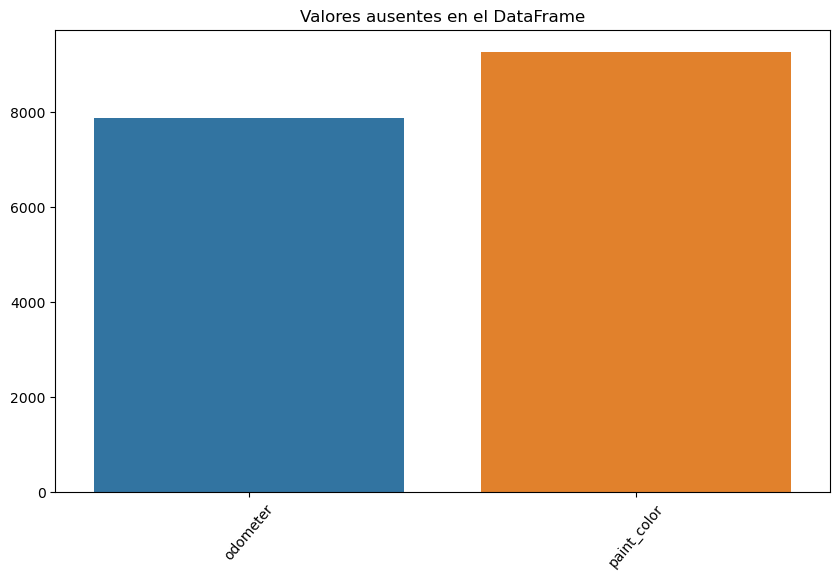

In [51]:
# trazar un gráfico actualizado para mostrar los valores ausentes en el dataframe

plt.figure(figsize=(10, 6))
missing_columns = data.isnull().sum()  
missing_columns = missing_columns[missing_columns > 0]
sns.barplot(x=missing_columns.index, y=missing_columns.values)
plt.title('Valores ausentes en el DataFrame')
plt.xticks(rotation=50)
plt.show()

In [52]:
# mostrar los valores ausentes en la columna `odometer`

data['odometer'].isna().sum()

7892

In [53]:
# iterar a través de los valores ausentes en `odometer`

for index, row in data[data['odometer'].isna()].iterrows():
    model_year = row['model_year']
    filtered_vehicles = data[(data['model_year'] == model_year) & (data['odometer'].notna())]
    avg_odometer = filtered_vehicles['odometer'].mean()
    data.at[index, 'odometer'] = avg_odometer

In [54]:
# verificar si se han imputado todos los valores ausentes

data['odometer'].isna().sum()

1

In [55]:
# mostrar el valor ausente en la columna `model_year`

data[data['odometer'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
45694,18000,1929.0,ford f-150,good,8.0,gas,NaN,manual,other,silver,False,2018-11-18,59


In [56]:
# calcular el recuento de los valores únicos en la columna `model_year` donde el modelo es 'ford f-150'

ford_f_150_model_year_count = data[data['model'] == 'ford f-150']['model_year'].value_counts().sort_index()
ford_f_150_model_year_count.head()

1929.0    1
1936.0    1
1954.0    1
1975.0    1
1977.0    1
Name: model_year, dtype: int64

In [57]:
# calcular el promedio de millaje para modelos Ford F-150 entre 1930 y 1940

filtered_data = data[(data['model'] == 'ford f-150') & (data['model_year'] >= 1930) & (data['model_year'] <= 1940)]
average_odometer = filtered_data['odometer'].mean()

print("Promedio de millaje para modelos Ford F-150 entre 1930 y 1940:", average_odometer)

Promedio de millaje para modelos Ford F-150 entre 1930 y 1940: 30000.0


In [58]:
# imputar el valor promedio a la fila con valores ausentes en la columna `odometer`

data.loc[data['odometer'].isna(), 'odometer'] = average_odometer

In [59]:
# comprobar que el dataframe se actualizó correctamente

data['odometer'].isna().sum()

0

__Imputación de los valores ausentes en la columna `odometer`__

 - Filtramos los vehículos con el __mismo__ `model_year` y que tenían valores de millaje no nulos
 - Calculamos el __promedio__ de millaje de estos vehículos 
 - __Imputamos__ el valor ausente en `odometer` con el promedio de millaje calculado
 - Después de la imputación quedó un vehículo sin información sobre el millaje (__Ford F-150__ del 1929)
 - Calculamos el __promedio__ de millaje para modelos Ford F-150 entre los años 1930 y 1940
 - __Imputamos__ el valor promedio calculado
 - La única columna que aún contiene __valores ausentes__ es la columna `paint_color`
 - Si esta carateristica es esencial, podríamos __descartar__ los vehículos con valores ausentes en esta columna

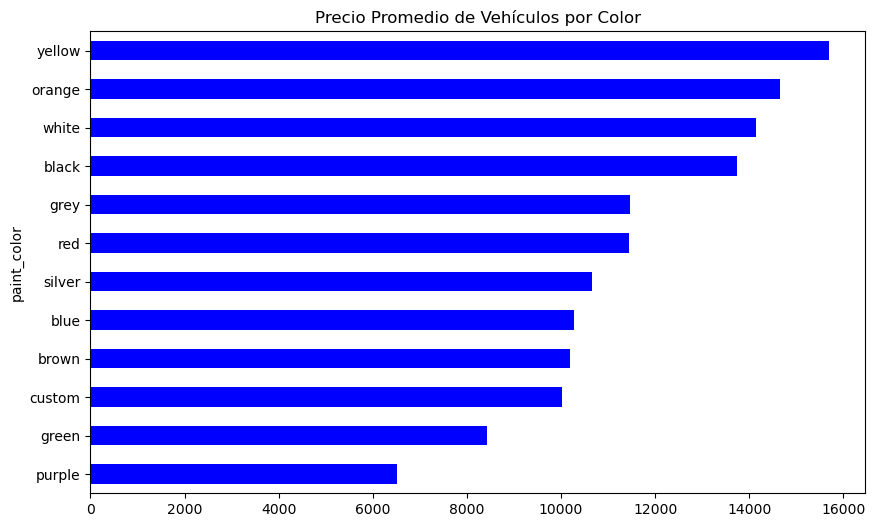

In [60]:
# calcular el promedio del precio por color

color_avg_price = data.groupby('paint_color')['price'].mean()
color_avg_price_sorted = color_avg_price.sort_values(ascending=True)

plt.figure(figsize=(10, 6))
color_avg_price_sorted.plot(kind='barh', color='blue')
plt.title('Precio Promedio de Vehículos por Color')
plt.show()

## Corregir los tipos de datos

In [61]:
# convertir valores flotantes a enteros en todo el dataframe

columns_to_convert = ['model_year', 'cylinders', 'odometer']
data[columns_to_convert] = data[columns_to_convert].astype(int)

## Enriquecer datos

In [62]:
# agregar los años del vehículo cuando el anuncio se colocó

data['vehicle_age_at_posting'] = data['date_posted'].dt.year - data['model_year']
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age_at_posting
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,NaN,True,2018-06-23,19,7
1,25500,2009,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,9
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,6
3,1500,2003,ford f-150,fair,8,gas,160092,automatic,pickup,NaN,False,2019-03-22,9,16
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2


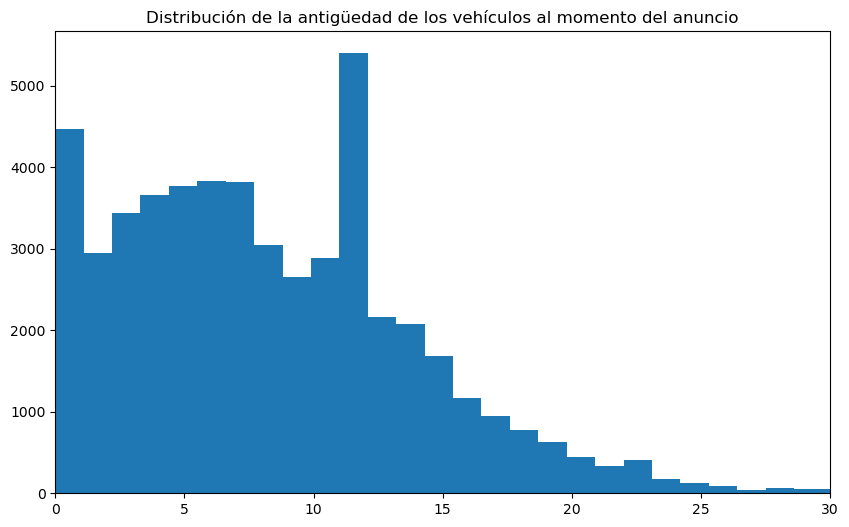

In [63]:
# trazar un histograma para mostrar la distribución de la antigüedad de los vehículos al momento del anuncio

plt.figure(figsize=(10, 6))
data['vehicle_age_at_posting'].hist(bins=100, grid=False)
plt.title('Distribución de la antigüedad de los vehículos al momento del anuncio')
plt.xlim(0, 30)
plt.show()

In [64]:
# agregar el millaje promedio del vehículo por año

data['average_mileage_by_year'] = (data['odometer'] / (data['vehicle_age_at_posting'] + 1)).round().astype(int)
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age_at_posting,average_mileage_by_year
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,NaN,True,2018-06-23,19,7,18125
1,25500,2009,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,9,8870
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,6,15714
3,1500,2003,ford f-150,fair,8,gas,160092,automatic,pickup,NaN,False,2019-03-22,9,16,9417
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2,26968


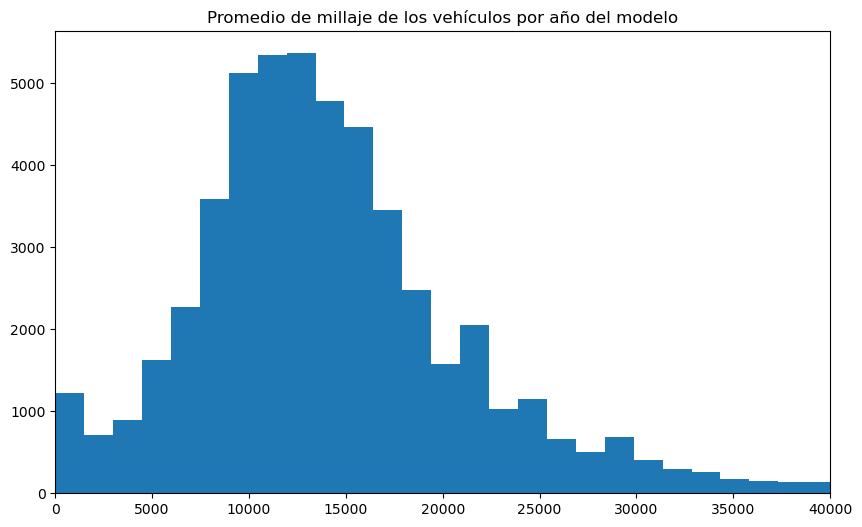

In [65]:
# trazar un histograma para mostrar la distribución depromedio de millaje de los vehículos por año del modelo

plt.figure(figsize=(10, 6))
data['average_mileage_by_year'].hist(bins=250, grid=False)
plt.title('Promedio de millaje de los vehículos por año del modelo')
plt.xlim(0, 40000)
plt.show()

In [66]:
# reemplazar los valores de `condition` con una escala númerica

condition_mapping = {
    'new': 5,
    'excellent': 4,
    'like new': 3,
    'good': 2,
    'fair': 1,
    'salvage': 0
}

data['condition'] = data['condition'].map(condition_mapping)
data['condition'].value_counts()

4    24773
2    20145
3     4742
1     1607
5      143
0      115
Name: condition, dtype: int64

In [67]:
# crear una copia del dataframe `data_clean` donde descartamos las filas con valores ausentes en `paint_color` 

data_clean = data[data['paint_color'].notnull()].copy()

# Comprobar datos limpios

In [68]:
# imprimir informaciones sobre los datos

data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42258 entries, 1 to 51523
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   price                    42258 non-null  int64         
 1   model_year               42258 non-null  int64         
 2   model                    42258 non-null  object        
 3   condition                42258 non-null  int64         
 4   cylinders                42258 non-null  int64         
 5   fuel                     42258 non-null  object        
 6   odometer                 42258 non-null  int64         
 7   transmission             42258 non-null  object        
 8   type                     42258 non-null  object        
 9   paint_color              42258 non-null  object        
 10  is_4wd                   42258 non-null  bool          
 11  date_posted              42258 non-null  datetime64[ns]
 12  days_listed              42258 n

In [69]:
# imprimir una muestra de datos

data_clean

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age_at_posting,average_mileage_by_year
1,25500,2009,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,9,8870
2,5500,2013,hyundai sonata,3,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,6,15714
4,14900,2017,chrysler 200,4,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2,26968
5,14990,2014,chrysler 300,4,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,4,11591
6,12990,2015,toyota camry,4,4,gas,79212,automatic,sedan,white,False,2018-12-27,73,3,19803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51518,3750,2005,ford taurus,4,6,gas,110200,automatic,sedan,silver,False,2018-08-10,63,13,7871
51520,9249,2013,nissan maxima,3,6,gas,88136,automatic,sedan,black,False,2018-10-03,37,5,14689
51521,2700,2002,honda civic,0,4,gas,181500,automatic,sedan,white,False,2018-11-14,22,16,10676
51522,3950,2009,hyundai sonata,4,4,gas,128000,automatic,sedan,blue,False,2018-11-15,32,9,12800


# Estudiar parámetros principales

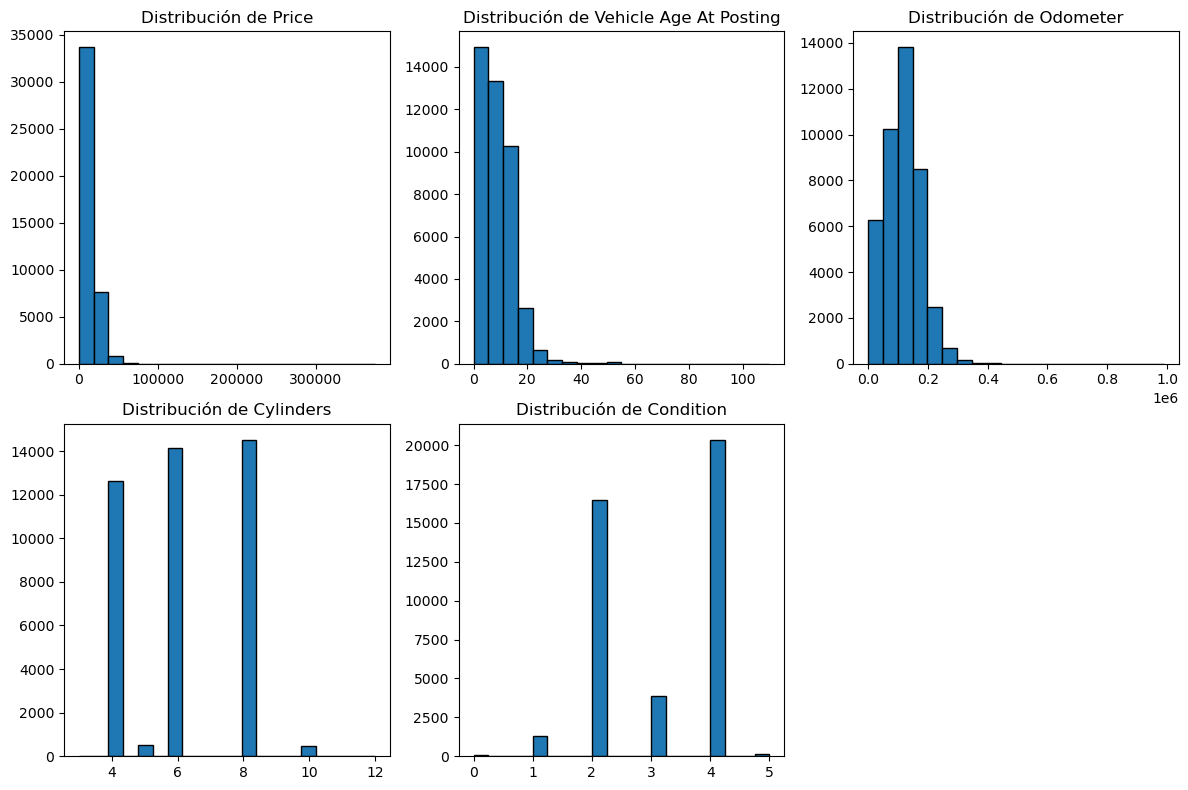

In [70]:
# mostrar la distribucion de los datos por las caracteristicas claves:
# `price`, `vehicle_age_at_posting`, `odometer`, `cylinders`, `condition`

columns = ['price', 'vehicle_age_at_posting', 'odometer', 'cylinders', 'condition']
num_columns = len(columns)

plt.figure(figsize=(12, 8))

for i, column in enumerate(columns, start=1):
    plt.subplot(2, 3, i)
    data_clean[column].hist(bins=20, edgecolor='black', grid=False)
    plt.title(f'Distribución de {column.replace("_", " ").title()}')

plt.tight_layout()
plt.show()

# Estudiar y tratar valores atípicos

In [71]:
# crear una copia del dataframe `data_cut`

data_cut = data_clean.copy()

In [72]:
# definir las columnas en las que hay valores atípicos

columns_to_cut = ['price', 'vehicle_age_at_posting', 'odometer', 'cylinders', 'condition']

In [73]:
# calcular los cuartiles Q1 y Q3 para cada variable

Q1_price = np.percentile(data_cut['price'], 25)
Q3_price = np.percentile(data_cut['price'], 75)
IQR_price = Q3_price - Q1_price

Q1_vehicle_age = np.percentile(data_cut['vehicle_age_at_posting'], 25)
Q3_vehicle_age = np.percentile(data_cut['vehicle_age_at_posting'], 75)
IQR_vehicle_age = Q3_vehicle_age - Q1_vehicle_age

Q1_odometer = np.percentile(data_cut['odometer'], 25)
Q3_odometer = np.percentile(data_cut['odometer'], 75)
IQR_odometer = Q3_odometer - Q1_odometer

Q1_cylinders = np.percentile(data_cut['cylinders'], 25)
Q3_cylinders = np.percentile(data_cut['cylinders'], 75)
IQR_cylinders = Q3_cylinders - Q1_cylinders

Q1_condition = np.percentile(data_cut['condition'], 25)
Q3_condition = np.percentile(data_cut['condition'], 75)
IQR_condition = Q3_condition - Q1_condition

In [74]:
# definir los límites utilizando el rango intercuartílico

price_lower_bound = Q1_price - 1.5 * IQR_price
price_upper_bound = Q3_price + 1.5 * IQR_price

vehicle_age_lower_bound = Q1_vehicle_age - 1.5 * IQR_vehicle_age
vehicle_age_upper_bound = Q3_vehicle_age + 1.5 * IQR_vehicle_age

odometer_lower_bound = Q1_odometer - 1.5 * IQR_odometer
odometer_upper_bound = Q3_odometer + 1.5 * IQR_odometer

cylinders_lower_bound = Q1_cylinders - 1.5 * IQR_cylinders
cylinders_upper_bound = Q3_cylinders + 1.5 * IQR_cylinders

condition_lower_bound = Q1_condition - 1.5 * IQR_condition
condition_upper_bound = Q3_condition + 1.5 * IQR_condition

In [75]:
# imprimir los límites calculados

print("Límites utilizando el rango intercuartílico:")
print(f"Precio: [{price_lower_bound}, {price_upper_bound}]")
print(f"Edad del vehículo: [{vehicle_age_lower_bound}, {vehicle_age_upper_bound}]")
print(f"Kilometraje: [{odometer_lower_bound}, {odometer_upper_bound}]")
print(f"Cilindros: [{cylinders_lower_bound}, {cylinders_upper_bound}]")
print(f"Condición: [{condition_lower_bound}, {condition_upper_bound}]")

Límites utilizando el rango intercuartílico:
Precio: [-12536.0, 34224.0]
Edad del vehículo: [-8.0, 24.0]
Kilometraje: [-44250.0, 269750.0]
Cilindros: [-2.0, 14.0]
Condición: [-1.0, 7.0]


In [76]:
# Filtrar valores atípicos en el DataFrame

data_cut = data_clean[
    (data_clean['price'] >= price_lower_bound) & (data_clean['price'] <= price_upper_bound) &
    (data_clean['vehicle_age_at_posting'] >= vehicle_age_lower_bound) & (data_clean['vehicle_age_at_posting'] <= vehicle_age_upper_bound) &
    (data_clean['odometer'] >= odometer_lower_bound) & (data_clean['odometer'] <= odometer_upper_bound) &
    (data_clean['cylinders'] >= cylinders_lower_bound) & (data_clean['cylinders'] <= cylinders_upper_bound) &
    (data_clean['condition'] >= condition_lower_bound) & (data_clean['condition'] <= condition_upper_bound)
]

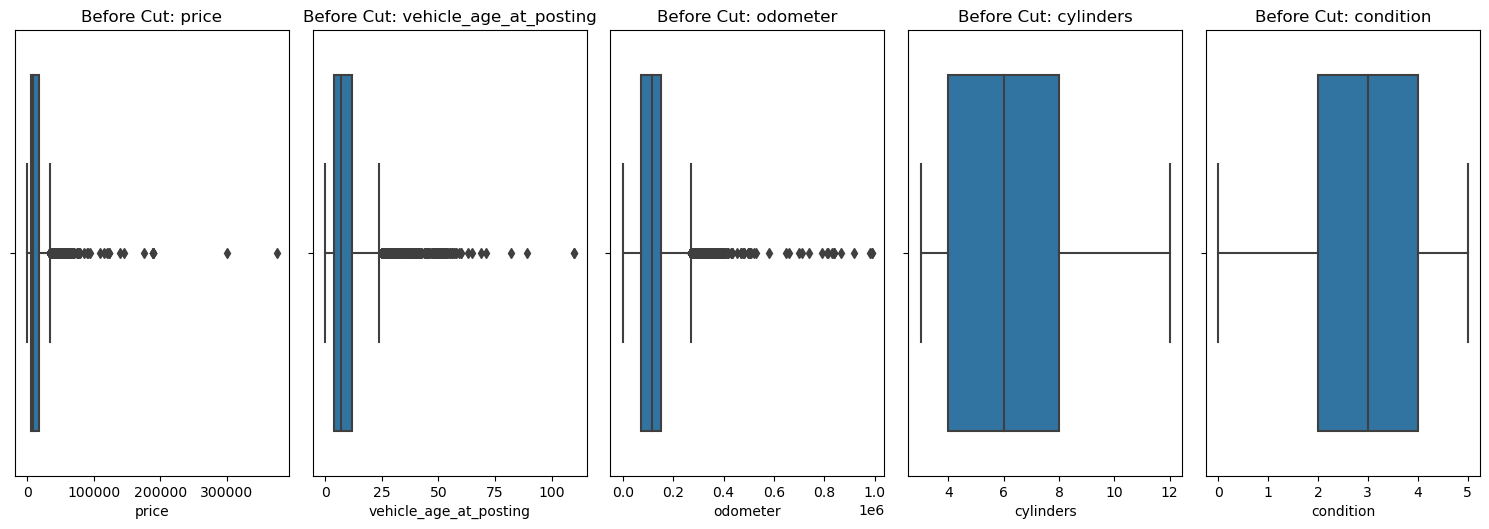

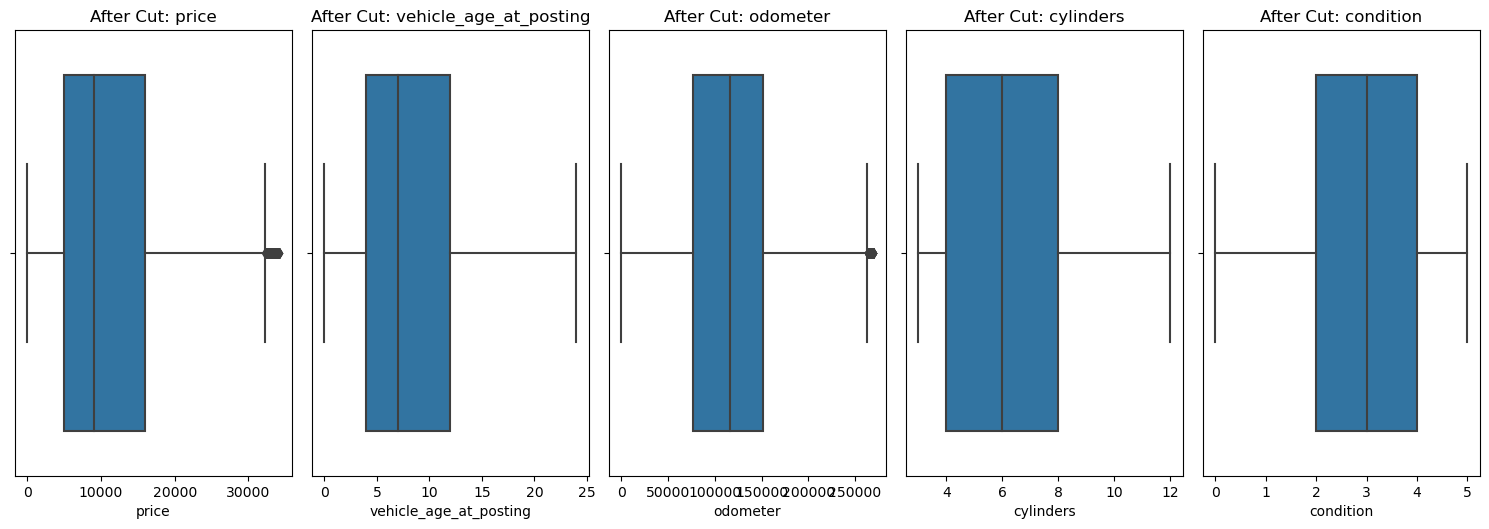

In [77]:
# mostrar diagramas de caja y bigotes antes y después del filtrado

columns_to_cut = ['price', 'vehicle_age_at_posting', 'odometer', 'cylinders', 'condition']

plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_cut, 1):
    plt.subplot(2, 5, i)
    sns.boxplot(x=data[column])
    plt.title(f'Before Cut: {column}')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_cut, 1):
    plt.subplot(2, 5, i)
    sns.boxplot(x=data_cut[column])
    plt.title(f'After Cut: {column}')

plt.tight_layout()
plt.show()

In [78]:
# descartar aquellas categorías que no son directamente relevantes para el análisis

data_cut = data_cut[(data_cut['type'] != 'bus')& (data_cut['type'] != 'other') & (data_cut['type'] != 'truck') & (data_cut['transmission'] != 'other') & (data_cut['condition'] != 0)] 

In [79]:
# almacena los datos sin valores atípicos en un dataframe separado

data_cut

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age_at_posting,average_mileage_by_year
1,25500,2009,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,9,8870
2,5500,2013,hyundai sonata,3,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,6,15714
4,14900,2017,chrysler 200,4,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2,26968
5,14990,2014,chrysler 300,4,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,4,11591
6,12990,2015,toyota camry,4,4,gas,79212,automatic,sedan,white,False,2018-12-27,73,3,19803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51517,11000,2012,dodge charger,4,8,gas,81000,automatic,sedan,black,False,2019-04-19,44,7,10125
51518,3750,2005,ford taurus,4,6,gas,110200,automatic,sedan,silver,False,2018-08-10,63,13,7871
51520,9249,2013,nissan maxima,3,6,gas,88136,automatic,sedan,black,False,2018-10-03,37,5,14689
51522,3950,2009,hyundai sonata,4,4,gas,128000,automatic,sedan,blue,False,2018-11-15,32,9,12800


# Estudiar parámetros principales sin valores atípicos

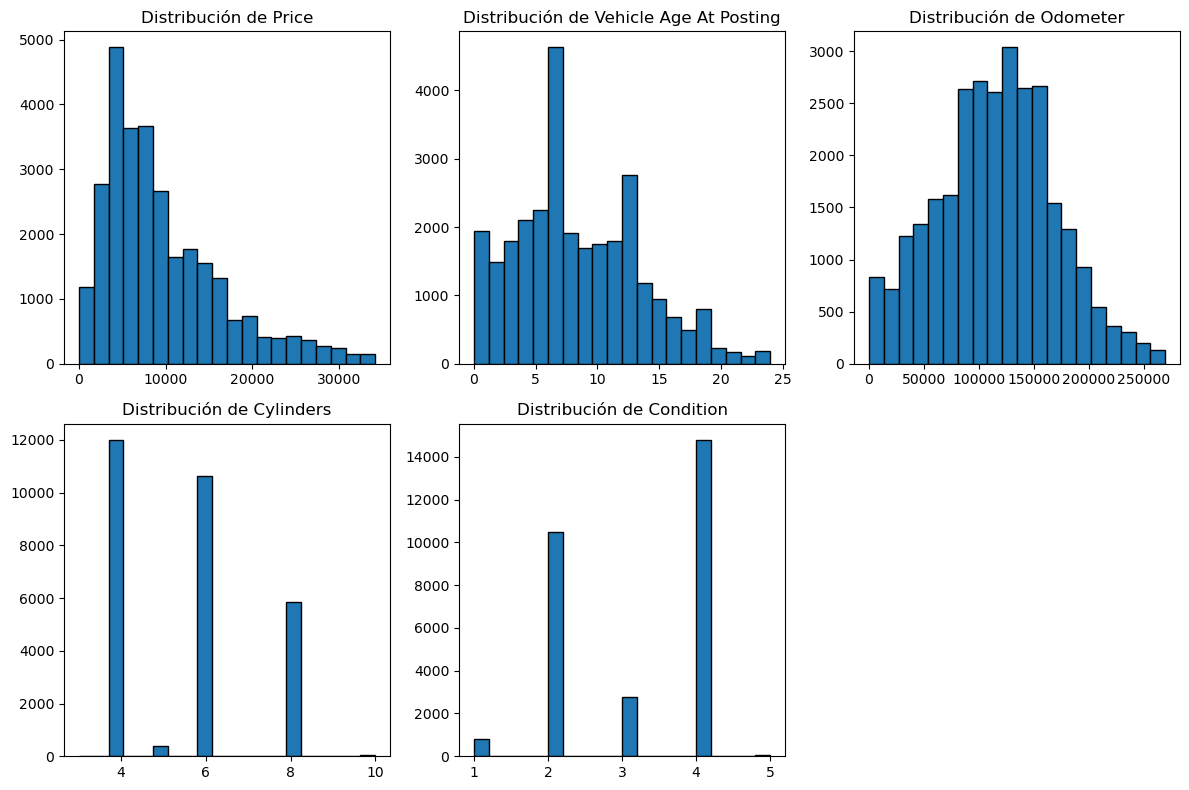

In [80]:
# mostrar la distribucion de los datos por las caracteristicas claves:
# `price`, `vehicle_age_at_posting`, `odometer`, `cylinders`, `condition`

columns = ['price', 'vehicle_age_at_posting', 'odometer', 'cylinders', 'condition']
num_columns = len(columns)

plt.figure(figsize=(12, 8))

for i, column in enumerate(columns, start=1):
    plt.subplot(2, 3, i)
    data_cut[column].hist(bins=20, edgecolor='black', grid=False)
    plt.title(f'Distribución de {column.replace("_", " ").title()}')

plt.tight_layout()
plt.show()

# Periodo de colocación de los anuncios

In [81]:
# mostrar resumen estadístico de la columna `days_listed`

data_cut['days_listed'].describe()

count    28946.000000
mean        39.698853
std         28.411186
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        267.000000
Name: days_listed, dtype: float64

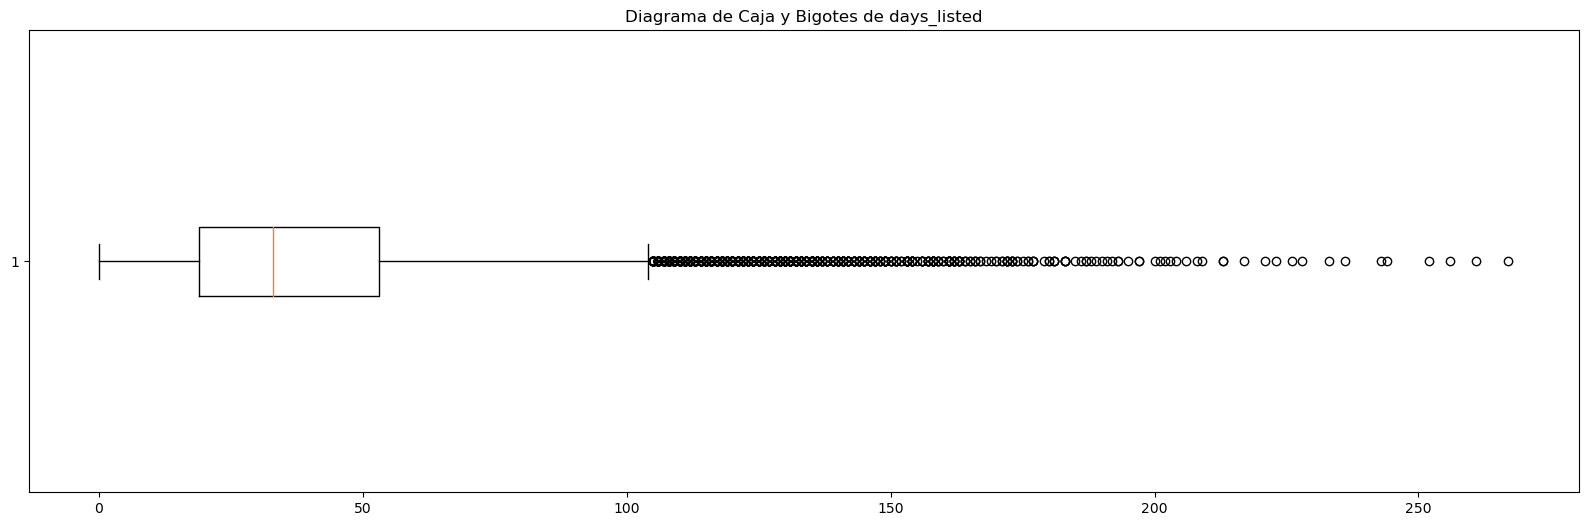

------------------------------------------------------------------------

Valores en la columna `days_listed` en orden ascendente:

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 179 180
 181 183 185 186 187 188 189 190 191 192 193 195 197 200 201 202 203 204
 206 208 209 213 217 221 223 226 228 233 236 243 244 252 256 261 

In [82]:
# trazar un diagrama de caja y bigotes para identificar valores atípicos en `days_listed`

plt.figure(figsize=(20, 6))
plt.boxplot(data_cut['days_listed'], vert=False)
plt.title('Diagrama de Caja y Bigotes de days_listed')
plt.show()
print('-'*72)
print()
print('Valores en la columna `days_listed` en orden ascendente:')
print()
print(np.sort(data_cut['days_listed'].unique()))

In [83]:
# determinar cuándo se eliminaron rápidamente los anuncios

data_cut[data_cut['days_listed'] < 3].shape

(273, 15)

In [84]:
# determinar cuándo los anuncios fueron publicados por un tiempo anormalmente largo

data_cut[data_cut['days_listed'] > 140].shape

(219, 15)

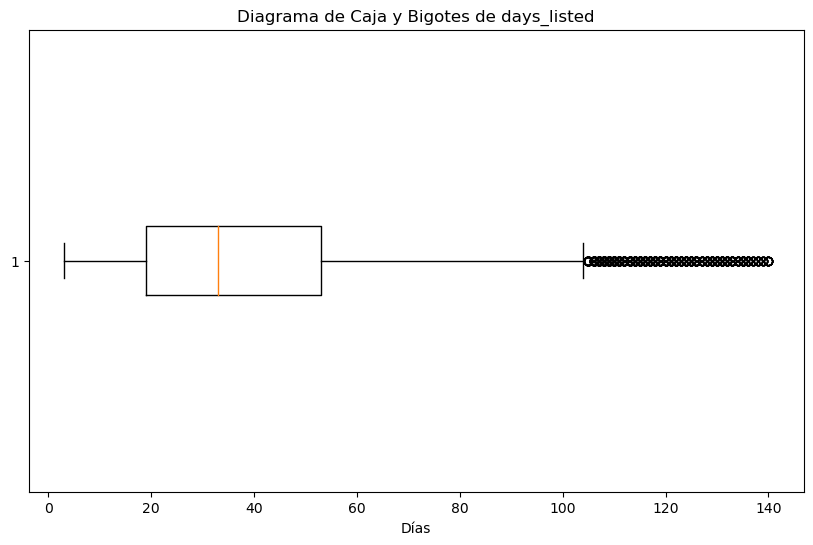

In [85]:
# trazar un diagrama de caja y bigotes descartando los valores atípicos

plt.figure(figsize=(10, 6))
lower_bound = 3
upper_bound = 140
data_cut_filtered = data_cut[(data_cut['days_listed'] >= lower_bound) & (data_cut['days_listed'] <= upper_bound)]
plt.boxplot(data_cut_filtered['days_listed'], vert=False)
plt.title('Diagrama de Caja y Bigotes de days_listed')
plt.xlabel('Días')
plt.show()

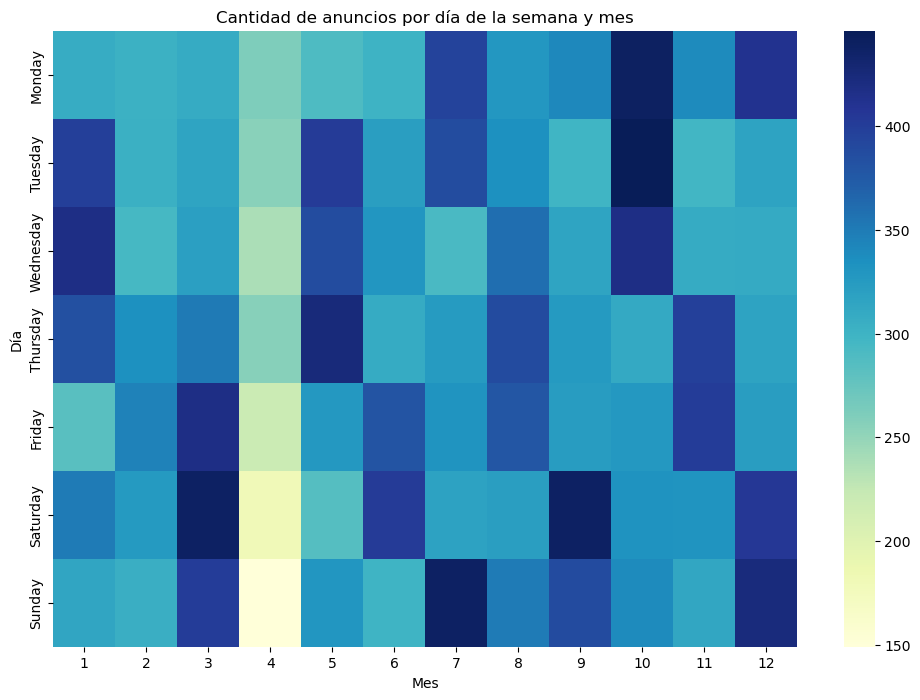

In [86]:
# mostrar la cantidad de Anuncios por día de la semana y mes

plt.figure(figsize=(12, 8))
filtered_data = data_cut[(data_cut['days_listed'] >= 3) & (data_cut['days_listed'] <= 140)]
pivot_table = filtered_data.pivot_table(index=filtered_data['date_posted'].dt.day_name(), columns=filtered_data['date_posted'].dt.month, aggfunc='size')
pivot_table.index = pd.CategoricalIndex(pivot_table.index, categories=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
pivot_table = pivot_table.sort_index()
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title('Cantidad de anuncios por día de la semana y mes')
plt.xlabel('Mes')
plt.ylabel('Día')
plt.show()

# Precio promedio por cada tipo de vehículo

In [87]:
# calcular el número de anuncios y el precio promedio por tipo de vehículo

data_cut.groupby('type')['price'].agg(['count', 'mean']).reset_index()

,type,count,mean
0,SUV,9616,10428.690412
1,convertible,277,12674.259928
2,coupe,1169,10321.089820
3,hatchback,784,6839.433673
4,mini-van,944,7974.917373
5,offroad,149,14350.516779
6,pickup,4606,14023.425532
7,sedan,9722,7020.751389
8,van,459,8944.117647
9,wagon,1220,8954.645082


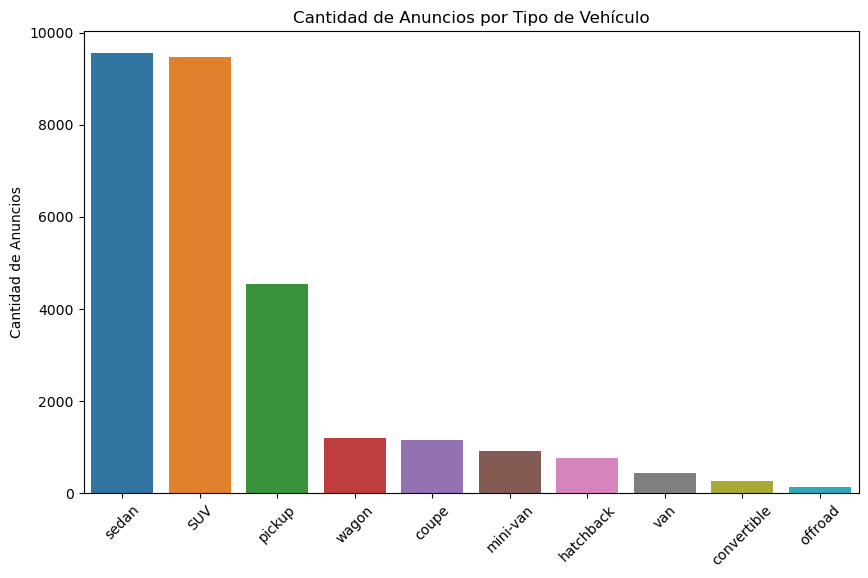

In [88]:
# mostrar la cantidad de anuncios por cada tipo de vehículo

ad_counts_by_type = data_cut_filtered['type'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=ad_counts_by_type.index, y=ad_counts_by_type.values)
plt.title('Cantidad de Anuncios por Tipo de Vehículo')
plt.ylabel('Cantidad de Anuncios')
plt.xticks(rotation=45)
plt.show()

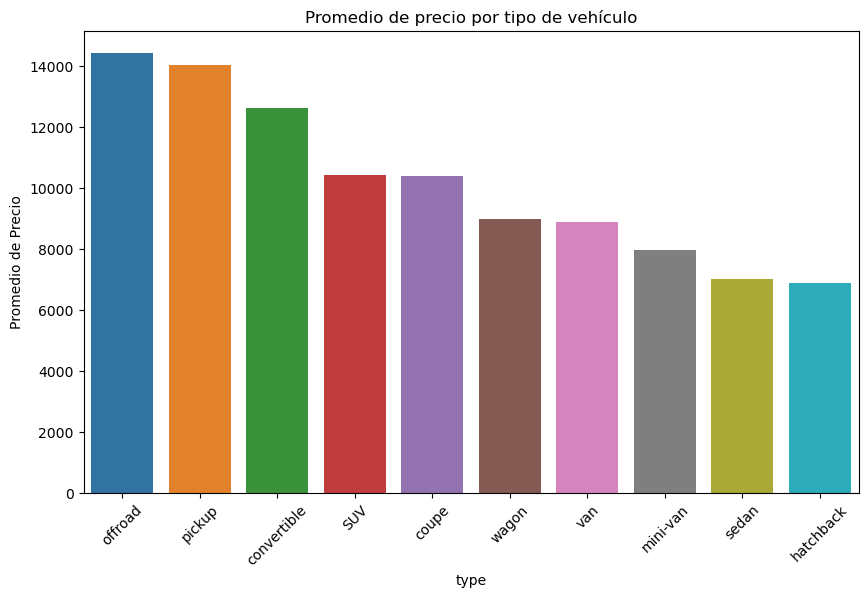

In [89]:
# mostrar el promedio de precio por cada tipo de vehículo

average_price_by_type = data_cut_filtered.groupby('type')['price'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x='type', y='price', data=average_price_by_type.reset_index().sort_values('price', ascending=False))
plt.title('Promedio de precio por tipo de vehículo')
plt.ylabel('Promedio de Precio')
plt.xticks(rotation=45)
plt.show()

# Factores de precio

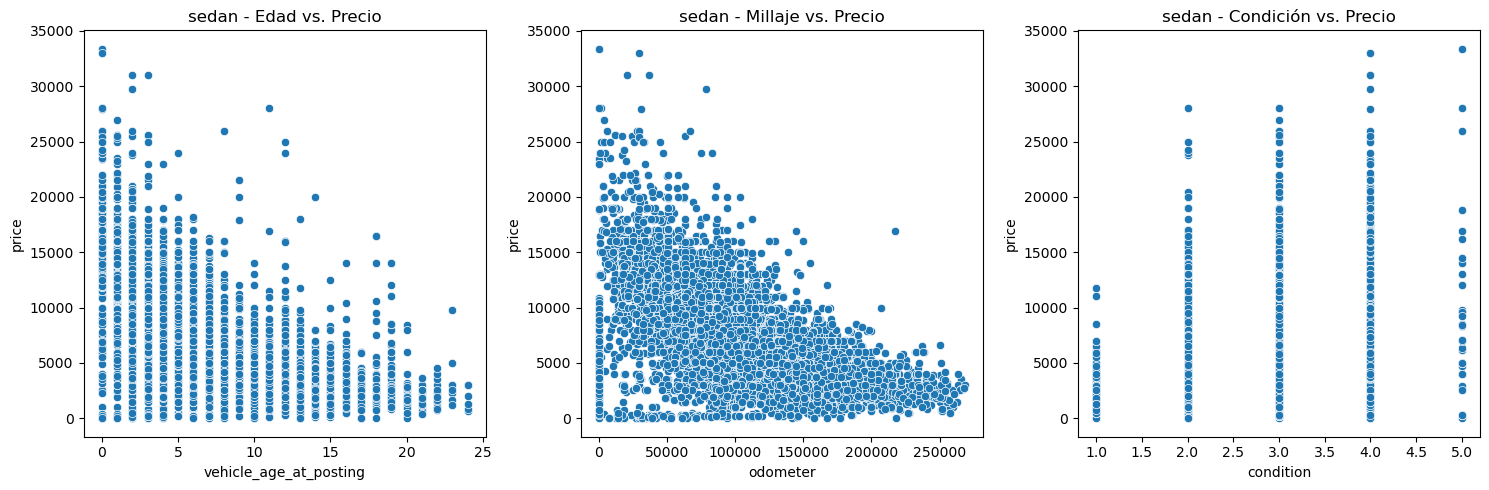

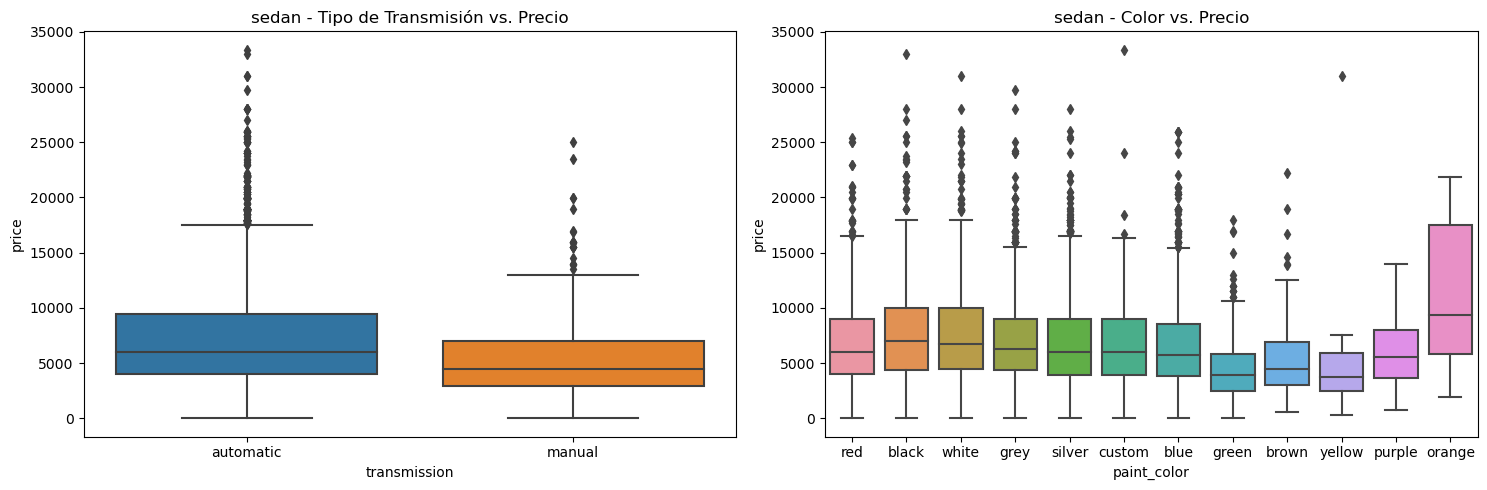

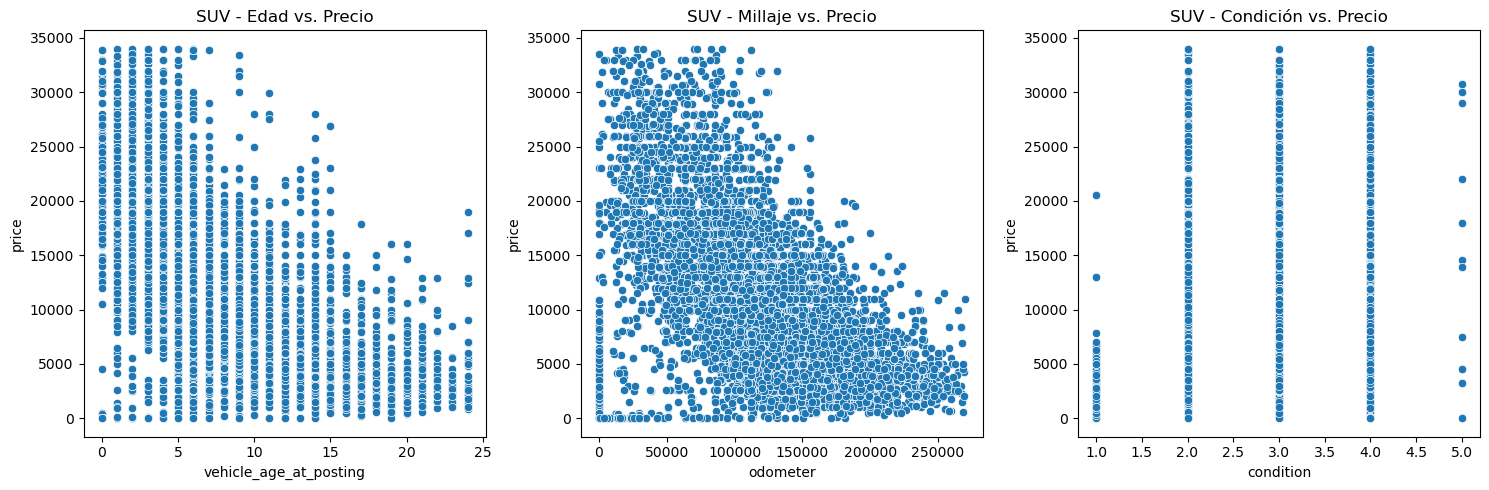

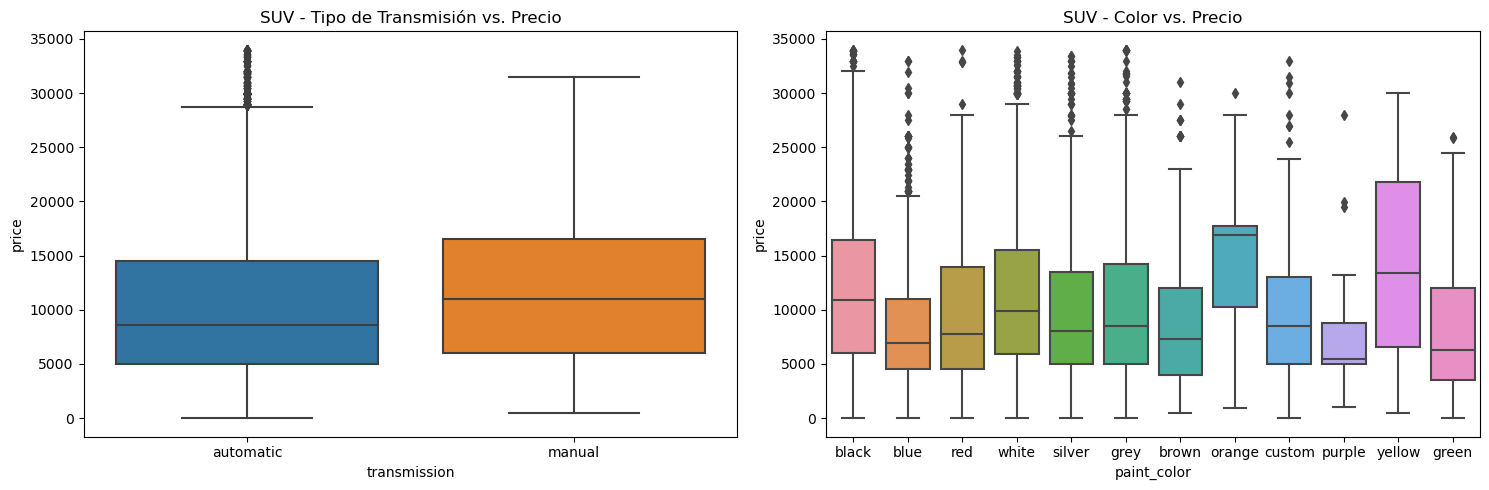

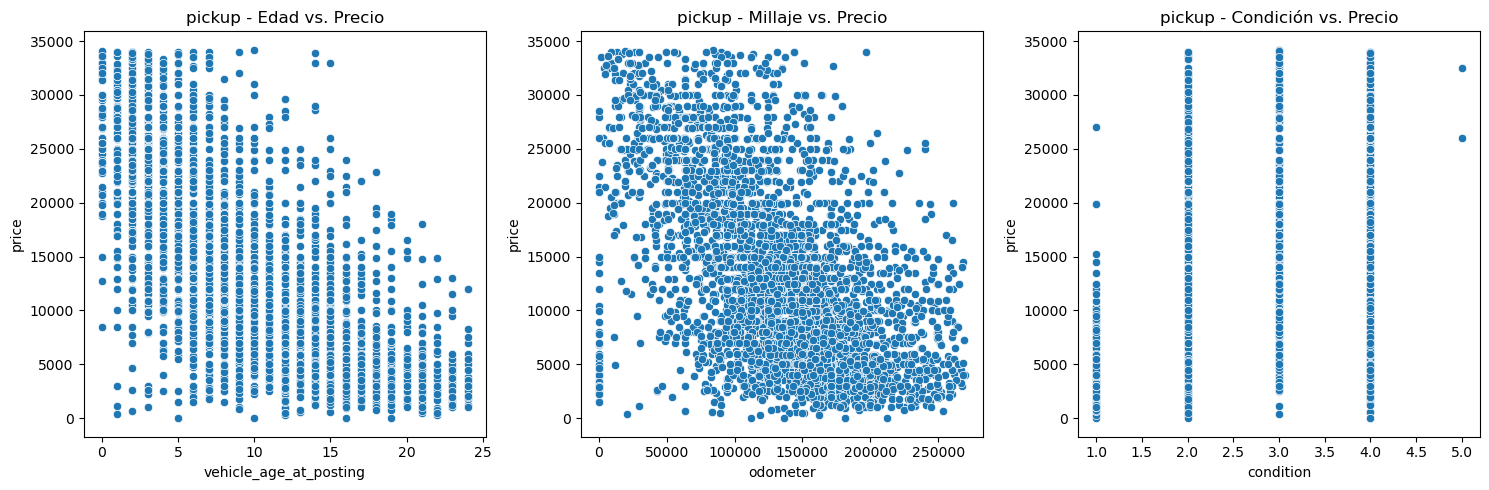

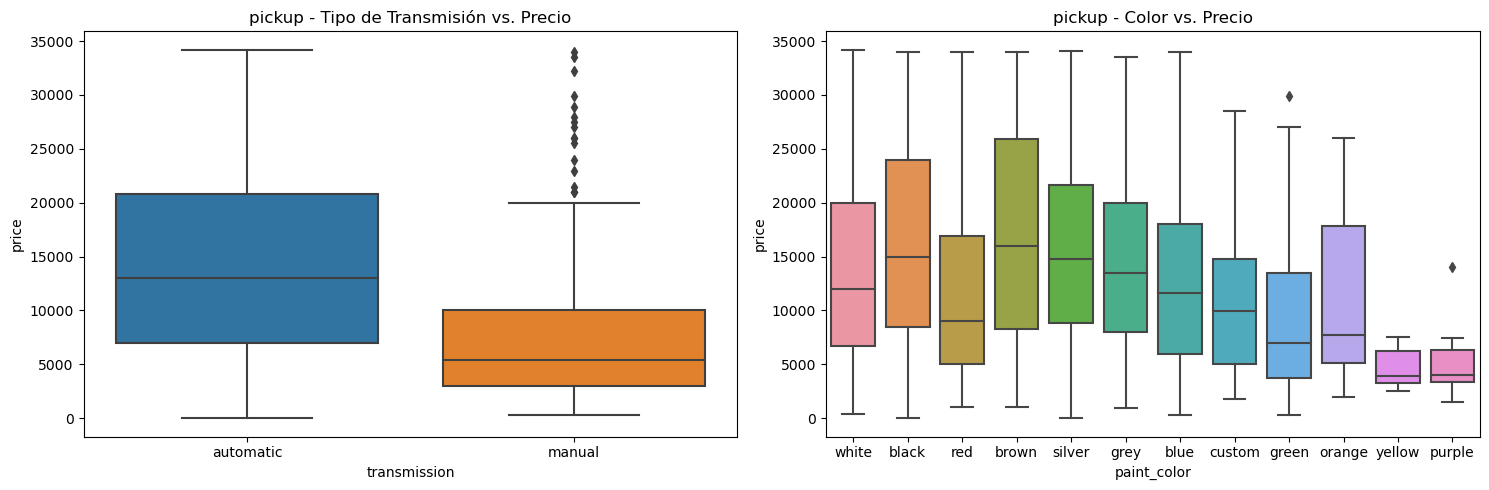

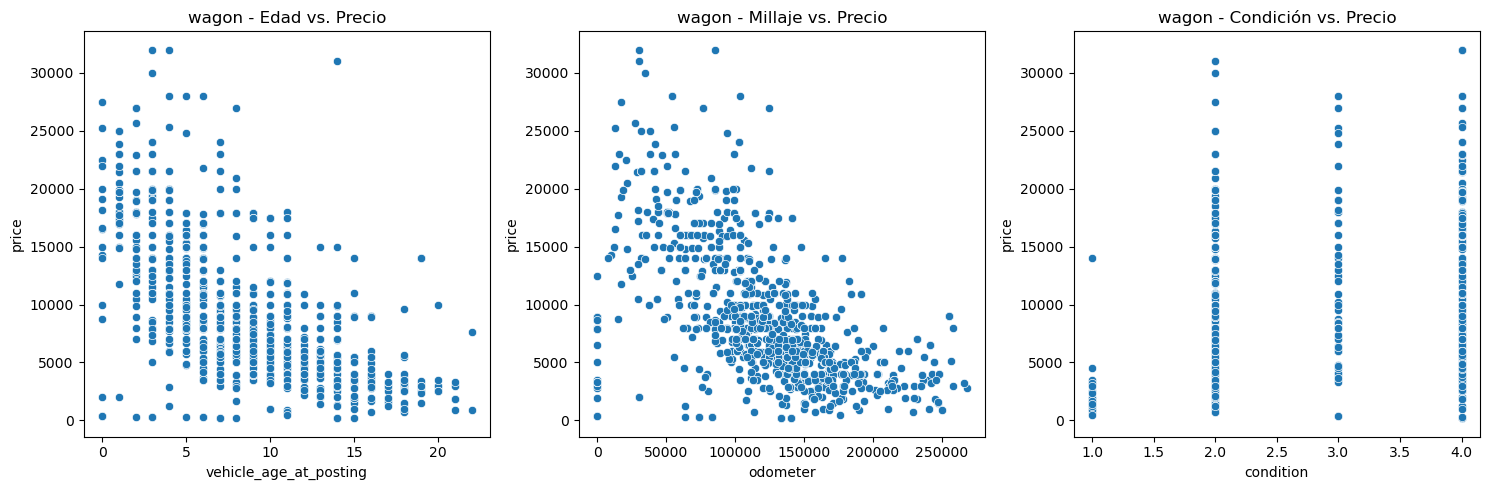

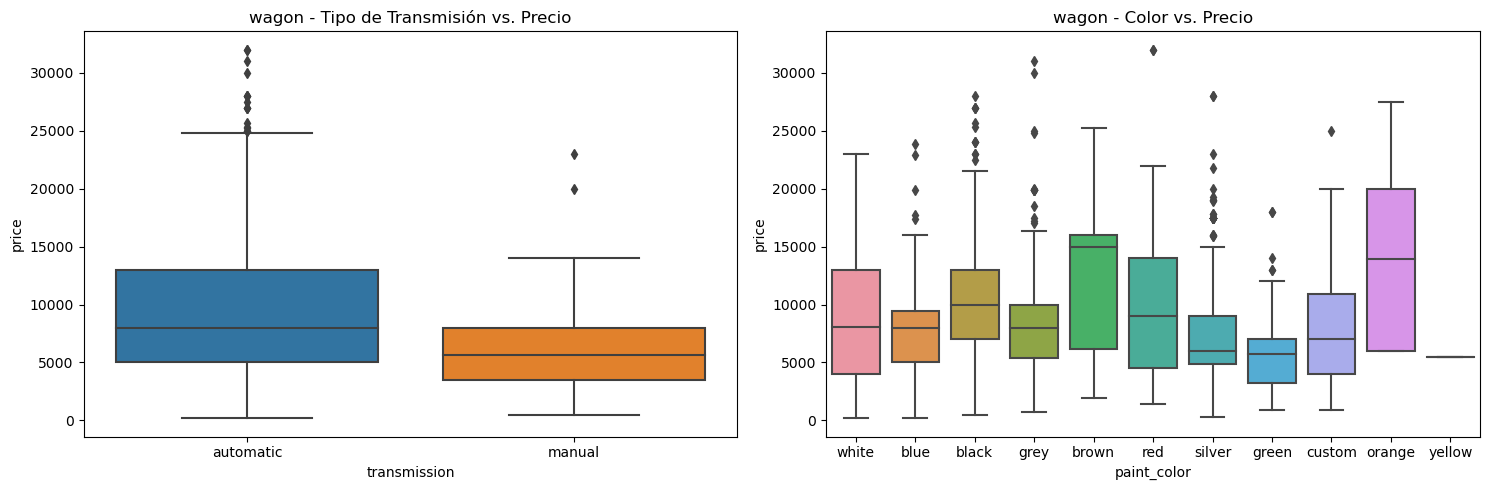

In [90]:
# trazar gráficos de dispersión y de caja y bigotes para cada factor 

top_4_popular_types = ad_counts_by_type.nlargest(4, keep='first').index

for vehicle_type in top_4_popular_types:
    type_data = data_cut_filtered[data_cut_filtered['type'] == vehicle_type]
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    sns.scatterplot(x='vehicle_age_at_posting', y='price', data=type_data)
    plt.title(f'{vehicle_type} - Edad vs. Precio')
    
    plt.subplot(1, 3, 2)
    sns.scatterplot(x='odometer', y='price', data=type_data)
    plt.title(f'{vehicle_type} - Millaje vs. Precio')
    
    plt.subplot(1, 3, 3)
    sns.scatterplot(x='condition', y='price', data=type_data)
    plt.title(f'{vehicle_type} - Condición vs. Precio')
    
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    sns.boxplot(x='transmission', y='price', data=type_data)
    plt.title(f'{vehicle_type} - Tipo de Transmisión vs. Precio')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x='paint_color', y='price', data=type_data)
    plt.title(f'{vehicle_type} - Color vs. Precio')
    
    plt.tight_layout()
    plt.show()

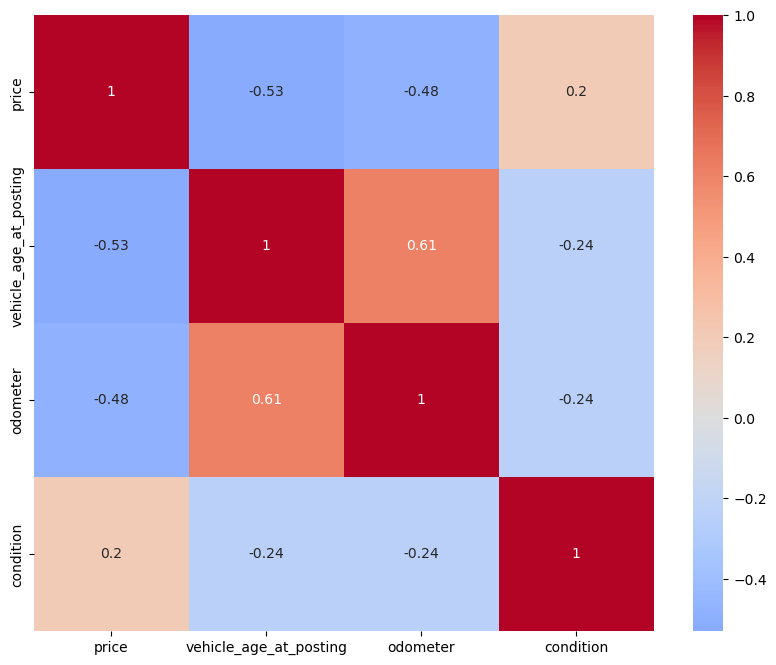

In [91]:
# calcular la matriz de correlación de los dos modelos más populares

top_2_popular_types = ad_counts_by_type.nlargest(2, keep='first').index
data_top_types = data_cut_filtered[data_cut_filtered['type'].isin(top_2_popular_types)]
correlation_matrix_top_types = data_top_types[['price', 'vehicle_age_at_posting', 'odometer', 'condition']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_top_types, annot=True, cmap='coolwarm', center=0)
plt.show()

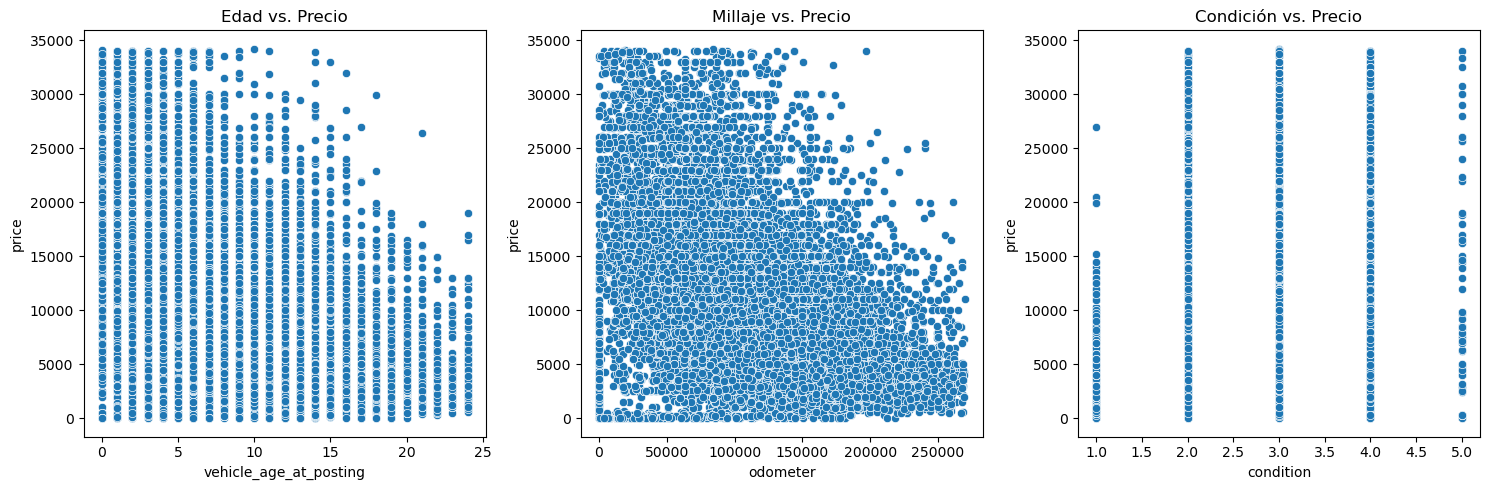

In [92]:
# trazar diagramas de dispersión para pares de variables

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='vehicle_age_at_posting', y='price', data=data_cut_filtered)
plt.title('Edad vs. Precio')

plt.subplot(1, 3, 2)
sns.scatterplot(x='odometer', y='price', data=data_cut_filtered)
plt.title('Millaje vs. Precio')

plt.subplot(1, 3, 3)
sns.scatterplot(x='condition', y='price', data=data_cut_filtered)
plt.title('Condición vs. Precio')

plt.tight_layout()
plt.show()

# Conclusión general

__Factores de influencia en el precio:__ 

 - La __antigüedad del vehículo__, el __millaje__, la __condición__ y el __tipo de vehículo__ son algunos de los principales factores que tienen un __impacto en el precio__

__Relaciones interesantes:__ 

 - En general, los vehículos __más nuevos__ tienden a tener __precios más altos__
 - Los vehículos con un __menor millaje__ y en __mejores condiciones__ también suelen tener __precios más elevados__
 - Se observaron diferencias en los precios según el __tipo de vehículo__, con __pickup__ y __offroad__ teniendo __precios en promedio más altos__

__Abordaje de artefactos problemáticos:__ 

 - Para tratar las fuentes de artefactos problemáticos, se tomaron diversas medidas
 - Se abordaron los valores ausentes en las columnas relevantes como `model_year`, `cylinders`, `odometer` y `paint_color` 
 - Estos __valores ausentes__ se imputaron de manera cuidadosa utilizando __información contextual__ y cálculos basados en otros datos 
 - Los duplicados fueron verificados y no se encontraron en el conjunto de datos
 - Los valores atípicos se identificaron y se removieron en base a __umbrales específicos__ en las columnas relevantes
 - También se descartaron aquellas categorías de vehículos que no eran directamente relevantes para el análisis


__Recomendaciones:__

 - __Para los vendedores__: proporcionar información precisa y completa sobre los factores que influyen significativamente en el precio
 - __Para los compradores__: investigar y comparar precios según la antigüedad, el millaje y la condición del vehículo
 - Estos factores pueden ayudar a determinar si el __precio es razonable__ en comparación con otros vehículos similares

__Tipo de vehículo impactante:__

 - El análisis sugiere que el __tipo de vehículo__ es un factor relevante en el precio
 - __SUV__ y __Sedane__ representan los tipos de vehículos más populares en el mercado 